### Defining and Importing necessary libraries

In [2]:
# Install essential libraries for ML and data processing
!pip install scikit-learn imbalanced-learn xgboost nltk matplotlib seaborn wordcloud mplfinance tqdm transformers


  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.2 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [3]:

!pip install mplfinance

In [5]:
# =========================
# Essential Libraries for Data Handling and Preprocessing
# =========================
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import os  # Operating system interfaces
import warnings  # Handle warning messages


# =========================
# Text Cleaning and NLP Libraries
# =========================
import re  # Regular expressions for text pattern matching
import string  # String operations
import nltk  # Natural Language Toolkit for NLP
from nltk.corpus import stopwords  # Stopword removal
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization

# =========================
# Data Visualization Libraries
# =========================
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud  # Generate word clouds
import mplfinance as mpf  # Financial data visualization (candlestick charts)

# =========================
# Machine Learning Libraries
# =========================
from sklearn.preprocessing import LabelEncoder  # Encode categorical labels
from sklearn.feature_extraction.text import CountVectorizer  # Bag of Words representation
from sklearn.decomposition import PCA  # Dimensionality Reduction
from sklearn.model_selection import train_test_split, GridSearchCV  # Model training and hyperparameter tuning
from sklearn.linear_model import LogisticRegression  # Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model
from sklearn.svm import SVC  # Support Vector Machine Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from imblearn.over_sampling import SMOTE  # Handling class imbalance with SMOTE

# =========================
# Model Evaluation Metrics
# =========================
from sklearn.metrics import (
    accuracy_score,  # Accuracy score
    confusion_matrix,  # Confusion matrix
    classification_report,  # Precision, recall, F1-score
    roc_curve,  # ROC curve
    auc  # Area Under the Curve (AUC) score
)

# =========================
# Transformers for Sentiment Analysis
# =========================
from transformers import pipeline  # Sentiment analysis pipeline from Hugging Face

# =========================
# Progress Tracking
# =========================
from tqdm import tqdm  # Progress bar for loops

# =========================
# Miscellaneous Libraries
# =========================
import mplfinance as mpf  # For financial visualizations (stock price candlestick charts)


warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

### Load the dataset

In [12]:
# =========================
# 📂 Load Dataset Function Documentation
# =========================
'''
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format
    | Arguments :
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# =========================
# Loading Datasets from CSV Files
# =========================

# Load tweet dataset from CSV file into a DataFrame
tweet_data = pd.read_csv('stock_tweets.csv')
tweet_data = pd.DataFrame(tweet_data)  # Ensures the loaded data is in DataFrame format

# Load stock dataset from CSV file into a DataFrame
stock_data = pd.read_csv('historical_stock_data.csv')
stock_data = pd.DataFrame(stock_data)  # Ensures the loaded data is in DataFrame format

# =========================
# Verifying Loaded Data
# =========================

# Display the shape of both datasets (number of rows and columns)
print("Tweet Data Shape:", tweet_data.shape)  # Shows dimensions of tweet data
print("Stock Data Shape:", stock_data.shape)  # Shows dimensions of stock data

# Display the first 5 rows of tweet data for verification
print("\nFirst 5 rows of Tweet Data:")
display(tweet_data.head())

# Display the first 5 rows of stock data for verification
print("\nFirst 5 rows of Stock Data:")
display(stock_data.head())


Tweet Data Shape: (80793, 4)
Stock Data Shape: (32300, 11)

First 5 rows of Tweet Data:


,Date,Tweet,Ticker,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."



First 5 rows of Stock Data:


,Date,Open,High,Low,Close,Volume,Ticker,Market Cap,P/E Ratio,Dividend Yield,EPS
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500.0,TSLA,1086540414976,166.40393,NaN,2.03
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500.0,TSLA,1086540414976,166.40393,NaN,2.03
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000.0,TSLA,1086540414976,166.40393,NaN,2.03
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500.0,TSLA,1086540414976,166.40393,NaN,2.03
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500.0,TSLA,1086540414976,166.40393,NaN,2.03


In [13]:
# =========================
# Convert 'Date' Columns to Datetime Format
# =========================

# Convert the 'Date' column in the stock dataset to datetime format
# 'errors="coerce"' will handle invalid parsing by converting them to NaT (Not a Time)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce').dt.date

# Convert the 'Date' column in the tweet dataset to datetime format
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'], errors='coerce').dt.date

# =========================
# Confirm Date Conversion
# =========================

# Print the first 5 rows of the converted 'Date' column in stock_data
print("First 5 dates from stock_data:")
print(stock_data['Date'].head())

# Print the first 5 rows of the converted 'Date' column in tweet_data
print("\nFirst 5 dates from tweet_data:")
print(tweet_data['Date'].head())


First 5 dates from stock_data:
0    2020-01-02
1    2020-01-03
2    2020-01-06
3    2020-01-07
4    2020-01-08
Name: Date, dtype: object

First 5 dates from tweet_data:
0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


In [14]:
def trim(df):
    """
    Cleans the DataFrame by performing the following operations:
    - Strips whitespace from column names
    - Drops duplicate rows
    - Converts column names to lowercase
    - Replaces spaces in column names with underscores
    - Converts object columns to string type and strips whitespace
    """

    # Strip leading and trailing whitespace from column names
    df.columns = df.columns.str.strip()

    # Drop duplicate rows to ensure unique entries
    df = df.drop_duplicates()

    # Convert all column names to lowercase for consistency
    df.columns = df.columns.str.lower()

    # Replace spaces in column names with underscores for easier access
    df.columns = df.columns.str.replace(' ', '_')

    # Select columns with object data types (categorical/textual data)
    df_obj = df.select_dtypes(['object'])

    # Convert object type columns to string and strip whitespace from each value
    df[df_obj.columns] = df_obj.apply(lambda x: x.astype(str).str.strip())

    # Print confirmation message after cleaning
    print("All column names cleaned, duplicates dropped, and text columns processed.")

    # Return the cleaned DataFrame
    return df


In [15]:
# =========================
# Applying the Cleaning Function to Both Datasets
# =========================

# Apply the trim function to the tweet dataset
print("Cleaning Tweet Data...")
tweet_data_cleaned = trim(tweet_data)  # Cleans tweet dataset (removes duplicates, standardizes column names, strips whitespace)

# Apply the trim function to the stock dataset
print("Cleaning Stock Data...")
stock_data_cleaned = trim(stock_data)  # Cleans stock dataset (removes duplicates, standardizes column names, strips whitespace)

# =========================
# Verification of Cleaned Data
# =========================

# Display the shape of cleaned tweet dataset
print("Shape of Cleaned Tweet Data:", tweet_data_cleaned.shape)

# Display the shape of cleaned stock dataset
print("Shape of Cleaned Stock Data:", stock_data_cleaned.shape)

# Preview the first 5 rows of the cleaned tweet dataset
print("\nFirst 5 rows of Cleaned Tweet Data:")
display(tweet_data_cleaned.head())

# Preview the first 5 rows of the cleaned stock dataset
print("\nFirst 5 rows of Cleaned Stock Data:")
display(stock_data_cleaned.head())


Cleaning Tweet Data...
All column names cleaned, duplicates dropped, and text columns processed.
Cleaning Stock Data...
All column names cleaned, duplicates dropped, and text columns processed.
Shape of Cleaned Tweet Data: (80769, 4)
Shape of Cleaned Stock Data: (32300, 11)

First 5 rows of Cleaned Tweet Data:


,date,tweet,ticker,company_name
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."



First 5 rows of Cleaned Stock Data:


,date,open,high,low,close,volume,ticker,market_cap,p/e_ratio,dividend_yield,eps
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500.0,TSLA,1086540414976,166.40393,NaN,2.03
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500.0,TSLA,1086540414976,166.40393,NaN,2.03
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000.0,TSLA,1086540414976,166.40393,NaN,2.03
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500.0,TSLA,1086540414976,166.40393,NaN,2.03
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500.0,TSLA,1086540414976,166.40393,NaN,2.03


Tweet Text Cleaning Steps:
Convert text to lowercase.
Remove URLs.
Remove mentions (@usernames).
Remove hashtags (but keep the words).
Remove numbers and special characters.
Remove extra whitespaces.
Remove stopwords.
Lemmatization.

In [19]:
# =========================
# Pre-processing Data Function Documentation
# =========================
'''
    /*------------------------ PRE-PROCESSING DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform the following preprocessing:
    |              • Convert text to lowercase
    |              • Remove punctuation marks
    |              • Remove URLs, mentions, hashtags, digits
    |              • Remove stopwords
    |              • Strip extra whitespace
    | Arguments :
    |       text : Input text to be pre-processed
    | Return    :
    |       text : Cleaned and pre-processed text
    *----------------------------------------------------------*/
'''

# Download required NLTK resources (Stopwords)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# =========================
# Define the Data Preprocessing Function
# =========================

def data_preprocessing(text):
    """
    Preprocesses the input text by:
    - Removing URLs, mentions, hashtags, digits, punctuation, and stopwords
    - Converting text to lowercase
    - Removing extra whitespace and single characters
    """

    # Ensure that the input is a string
    if not isinstance(text, str):
        return ""  # Return empty string if input is not a valid string

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (words starting with @)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (remove the # symbol and the following word)
    text = re.sub(r'#\w+', '', text)

    # Remove numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # Replace multiple whitespaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove single characters
    text = re.sub(r'\b\w\b', '', text)

    # Remove extra whitespace after removing single characters
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with fewer than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)

    # Remove stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


[nltk_data] Downloading package stopwords to /home/samyak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# =========================
# Applying Preprocessing to Tweet Data
# =========================

# Apply the data_preprocessing function to the 'tweet' column
# Cleans all text data by removing unnecessary characters and formatting
tweet_data_cleaned['tweet'] = tweet_data_cleaned['tweet'].apply(data_preprocessing)

# =========================
# Renaming 'stock_name' Column to 'ticker' (if applicable)
# =========================

# Check if the column 'stock_name' exists before renaming
if 'stock_name' in tweet_data_cleaned.columns:
    tweet_data_cleaned.rename(columns={'stock_name': 'ticker'}, inplace=True)  # Rename for consistency
    print("Column 'stock_name' has been renamed to 'ticker'.")
else:
    print("Column 'stock_name' not found in DataFrame. Skipping renaming.")

# =========================
# Verifying Data After Pre-processing
# =========================

# Display a message and preview of the cleaned DataFrame
print("\nData After Pre-processing:")
print("====================================\n")
display(tweet_data_cleaned.head())  # Display the first 5 rows of the preprocessed dataset


Column 'stock_name' not found in DataFrame. Skipping renaming.

Data After Pre-processing:



,date,tweet,ticker,company_name
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc."
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc."
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc."
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc."
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc."


In [22]:
# =========================
# Renaming 'Ticker' Column to 'ticker' for Consistency
# =========================

# Check if the column 'Ticker' exists before renaming
if 'Ticker' in tweet_data_cleaned.columns:
    tweet_data_cleaned.rename(columns={'Ticker': 'ticker'}, inplace=True)  # Rename for uniformity
    print("Column 'Ticker' has been successfully renamed to 'ticker'.")
else:
    print("Column 'Ticker' not found in DataFrame. Skipping renaming.")

# =========================
# Verifying Column Renaming
# =========================

# Print all column names to confirm the renaming
print("\nRenamed columns in tweet_data_cleaned:")
print(tweet_data_cleaned.columns)


Column 'Ticker' not found in DataFrame. Skipping renaming.

Renamed columns in tweet_data_cleaned:
Index(['date', 'tweet', 'ticker', 'company_name'], dtype='object')


In [23]:
# =========================
# Merging Tweet and Stock Datasets on 'date' and 'ticker'
# =========================

# Perform a left join to combine tweet data with corresponding stock data
# This ensures all records from tweet_data_cleaned are retained
merged_data = pd.merge(
    tweet_data_cleaned,  # Left DataFrame (tweets)
    stock_data_cleaned,  # Right DataFrame (stock data)
    on=['date', 'ticker'],  # Merge based on matching 'date' and 'ticker' values
    how='left'  # Retain all records from tweet_data_cleaned
)

# =========================
# Verifying the Merged Dataset
# =========================

# Display the shape of the merged DataFrame (rows, columns)
print("Shape of the merged dataset:", merged_data.shape)

# Preview the first 5 rows of the merged DataFrame to verify the merge
print("\nPreview of the merged dataset:")
display(merged_data.head())


Shape of the merged dataset: (80769, 13)

Preview of the merged dataset:


,date,tweet,ticker,company_name,open,high,low,close,volume,market_cap,p/e_ratio,dividend_yield,eps
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03


In [24]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker',
       'Market Cap', 'P/E Ratio', 'Dividend Yield', 'EPS'],
      dtype='object')


In [25]:
# =========================
# Checking for and Removing Duplicate Rows from Merged Dataset
# =========================

# Display the shape of the dataset before removing duplicates
print("Shape before removing duplicates:", merged_data.shape)

# Remove duplicate rows from the merged dataset in place
# Ensures only unique rows are retained
merged_data.drop_duplicates(inplace=True)

# Display the shape of the dataset after removing duplicates
print("Shape after removing duplicates:", merged_data.shape)

# =========================
# Verifying Duplicate Removal
# =========================

# Check for any remaining duplicate rows (should be 0 if successfully removed)
remaining_duplicates = merged_data.duplicated().sum()
print(f"Number of remaining duplicate rows: {remaining_duplicates}")


Shape before removing duplicates: (80769, 13)
Shape after removing duplicates: (80467, 13)
Number of remaining duplicate rows: 0


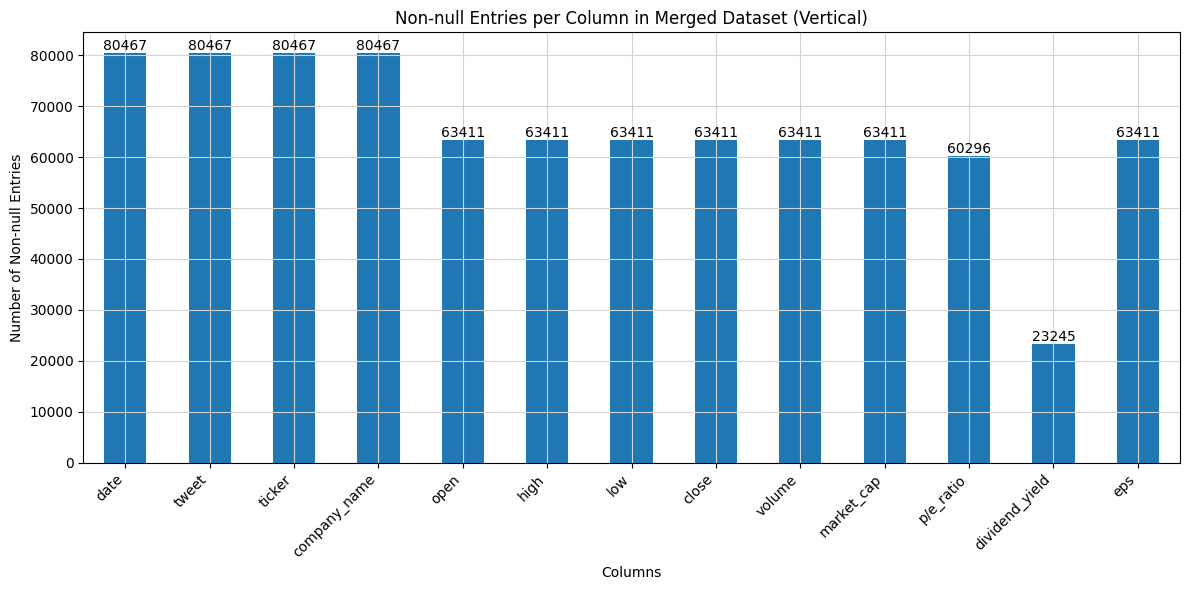

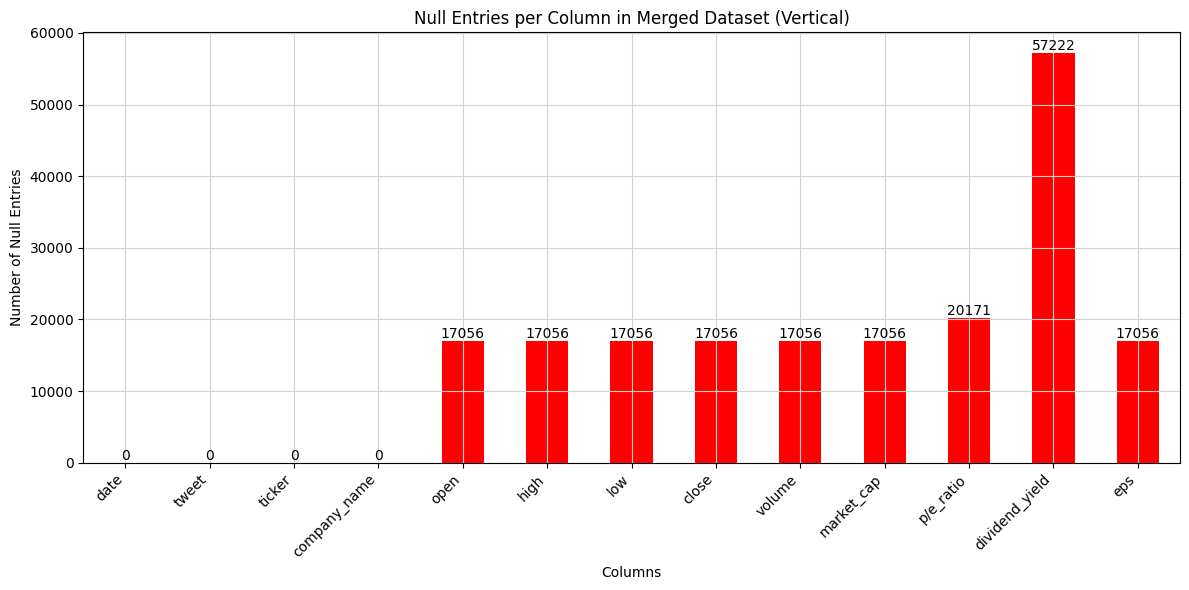

<Figure size 1200x600 with 0 Axes>

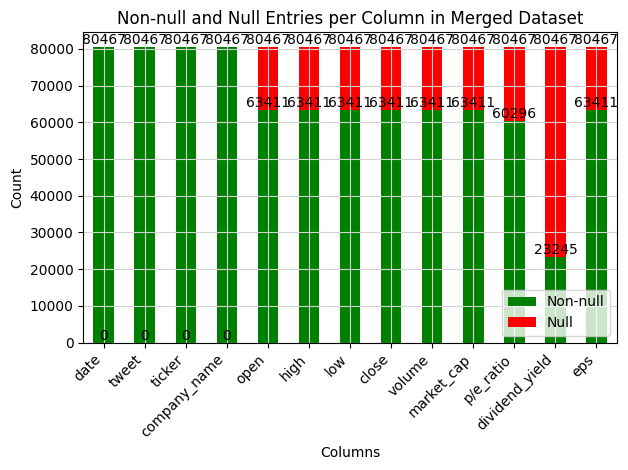

In [ ]:

def plot_counts(merged_data, plot_type='stacked'):
    """
    Plot vertical bar charts for non-null and null counts per column in the merged dataset.

    Parameters:
        merged_data (pd.DataFrame): The dataset for which counts will be calculated.
        plot_type (str): The type of visualization to display.
            Options:
                - 'non_null': Vertical bar chart for non-null counts.
                - 'null': Vertical bar chart for null counts.
                - 'stacked': Stacked vertical bar chart comparing non-null and null counts.
                  Default is 'stacked'.
    """
    # Calculate non-null counts for each column in the dataset.
    non_null_counts = merged_data.count()

    # Calculate null counts for each column in the dataset.
    null_counts = merged_data.isnull().sum()

    # Option for plotting non-null counts only.
    if plot_type == 'non_null':
        plt.figure(figsize=(12, 6))  # Set the size of the figure.
        ax = non_null_counts.plot(kind='bar')  # Plot a vertical bar chart.
        plt.title('Non-null Entries per Column in Merged Dataset (Vertical)')
        plt.xlabel('Columns')
        plt.ylabel('Number of Non-null Entries')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity.

        # Add data labels on top of each bar.
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()  # Adjust layout for better display.
        plt.show()

    # Option for plotting null counts only.
    elif plot_type == 'null':
        plt.figure(figsize=(12, 6))
        # Plot a vertical bar chart using red color to indicate missing values.
        ax = null_counts.plot(kind='bar', color='red')
        plt.title('Null Entries per Column in Merged Dataset (Vertical)')
        plt.xlabel('Columns')
        plt.ylabel('Number of Null Entries')
        plt.xticks(rotation=45, ha='right')

        # Add data labels on top of each bar.
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()
        plt.show()

    # Option for a stacked bar chart showing both non-null and null counts.
    elif plot_type == 'stacked':
        # Combine the non-null and null counts into a single DataFrame.
        data_to_plot = pd.DataFrame({
            'Non-null': non_null_counts,
            'Null': null_counts
        })
        plt.figure(figsize=(12, 6))
        # Plot a stacked vertical bar chart with distinct colors for clarity.
        ax = data_to_plot.plot(kind='bar', stacked=True, color=['green', 'red'])
        plt.title('Non-null and Null Entries per Column in Merged Dataset')
        plt.xlabel('Columns')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        # Add data labels on each segment of the stacked bars.
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()
        plt.show()

    else:
        # Raise an error if an invalid plot type is provided.
        raise ValueError("Invalid plot_type. Options are 'non_null', 'null', or 'stacked'.")


plot_counts(merged_data, plot_type='non_null')
plot_counts(merged_data, plot_type='null')
plot_counts(merged_data, plot_type='stacked')


In [72]:
# Display the shape before removing duplicates
print("Shape before removing duplicates:", merged_data.shape)

# Remove duplicate rows
merged_data.drop_duplicates(inplace=True)

# Display the shape after removing duplicates
print("Shape after removing duplicates:", merged_data.shape)


Shape before removing duplicates: (80467, 13)
Shape after removing duplicates: (80467, 13)


###EDA

In [73]:
#Copy the data
df_1 = merged_data.copy()
print(df_1.shape)
print("\nFirst 5 rows of Tweet Data:")
display(df_1.head())

(80467, 13)

First 5 rows of Tweet Data:


,date,tweet,ticker,company_name,open,high,low,close,volume,market_cap,p/e_ratio,dividend_yield,eps
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03


In [ ]:

def print_df_overview(df):
    """
    Print a detailed overview of a DataFrame.

    This function prints:
        - DataFrame info (summary including index dtype, columns, non-null values, etc.)
        - Descriptive statistics of numeric columns
        - Count of null (missing) values per column
        - Count of duplicate rows
        - Number of unique values per column
        - Column names
        - Data types of each column
        - Shape of the DataFrame (number of rows and columns)
        - Value counts for the 'ticker' column (if it exists)

    Parameters:
        df (pd.DataFrame): The DataFrame to be analyzed.
    """
    # Print basic information about the DataFrame
    print("DataFrame Info:")
    df.info()  # df.info() prints its output directly

    # Print descriptive statistics for numeric columns
    print("\nDataFrame Description:")
    print(df.describe())

    # Print the count of null (missing) values per column
    print("\nMissing Values (Null Count) per Column:")
    print(df.isnull().sum())

    # Print the total count of duplicate rows
    print("\nDuplicate Rows Count:")
    print(df.duplicated().sum())

    # Print the number of unique values for each column
    print("\nUnique Values per Column:")
    print(df.nunique())

    # Print the column names
    print("\nColumn Names:")
    print(list(df.columns))

    # Print the data types for each column
    print("\nData Types of Each Column:")
    print(df.dtypes)

    # Print the shape of the DataFrame (rows, columns)
    print("\nDataFrame Shape (Rows, Columns):")
    print(df.shape)

    # Print the value counts for the 'ticker' column if it exists
    if 'ticker' in df.columns:
        print("\nValue Counts for 'ticker' Column:")
        print(df['ticker'].value_counts())
    else:
        print("\nColumn 'ticker' does not exist in the DataFrame.")


print_df_overview(df_1)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 80467 entries, 0 to 80768
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            80467 non-null  object 
 1   tweet           80467 non-null  object 
 2   ticker          80467 non-null  object 
 3   company_name    80467 non-null  object 
 4   open            63411 non-null  float64
 5   high            63411 non-null  float64
 6   low             63411 non-null  float64
 7   close           63411 non-null  float64
 8   volume          63411 non-null  float64
 9   market_cap      63411 non-null  float64
 10  p/e_ratio       60296 non-null  float64
 11  dividend_yield  23245 non-null  float64
 12  eps             63411 non-null  float64
dtypes: float64(9), object(4)
memory usage: 8.6+ MB

DataFrame Description:
               open          high           low         close        volume  \
count  63411.000000  63411.000000  63411.000000  6

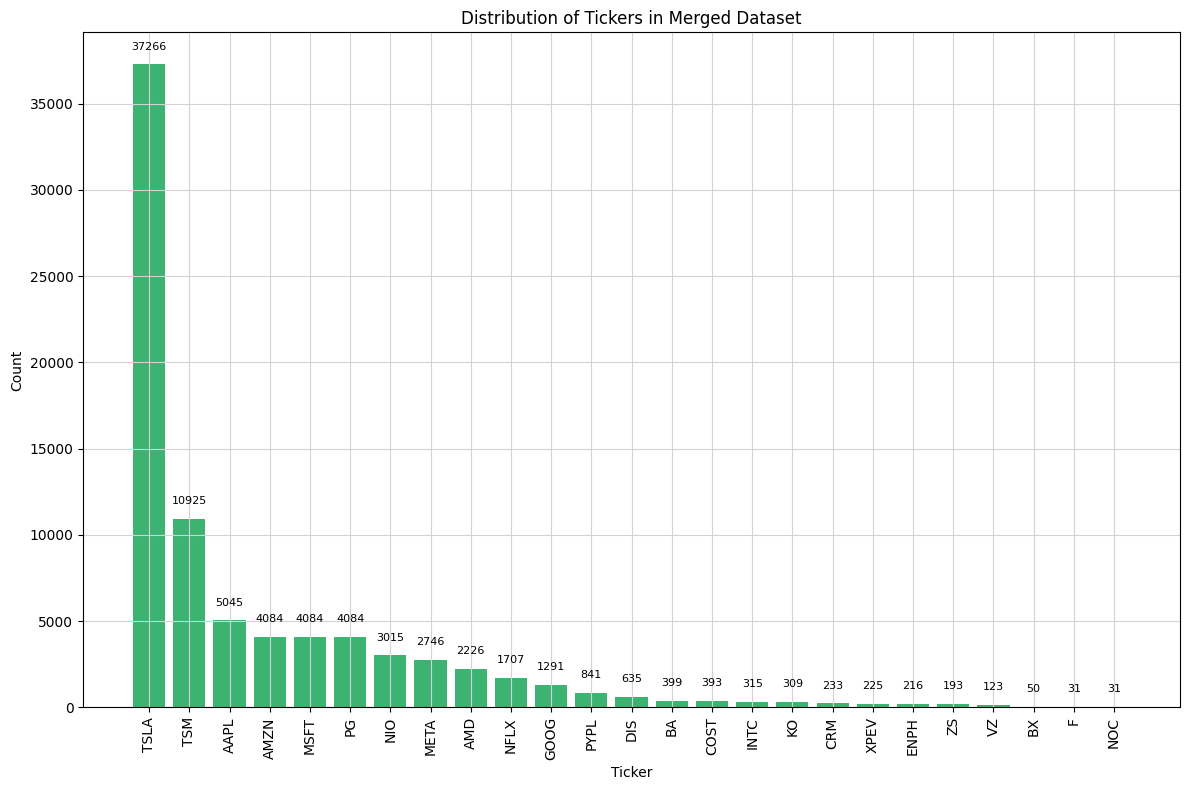

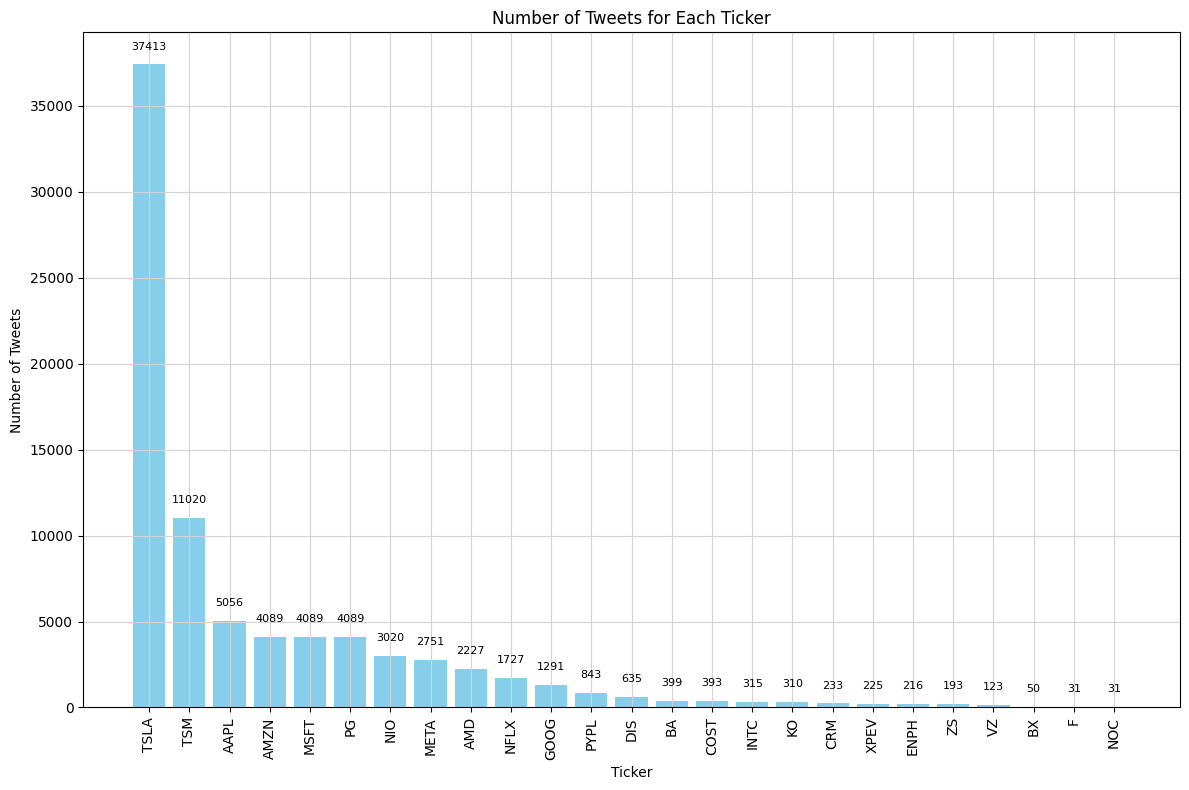

Tweet Counts per Ticker:
ticker
TSLA    37413
TSM     11020
AAPL     5056
AMZN     4089
MSFT     4089
PG       4089
NIO      3020
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
F          31
NOC        31
Name: count, dtype: int64


In [ ]:


def plot_ticker_distributions(merged_df, tweet_df):
    """
    Plot the distribution of tickers for both the merged dataset and tweet dataset.

    This function computes:
      - The ticker counts from the 'ticker' column in the merged DataFrame.
      - The ticker counts (number of tweets) from the 'ticker' column in the tweet DataFrame.

    It then creates two vertical bar plots:
      1. Distribution of Tickers in the Merged Dataset.
      2. Number of Tweets for Each Ticker.

    Both plots include:
      - A title, x- and y-axis labels.
      - Count labels above each bar.
      - Rotated x-axis labels for better readability.

    Parameters:
        merged_df (pd.DataFrame): The merged dataset containing a 'ticker' column.
        tweet_df (pd.DataFrame): The tweet dataset containing a 'ticker' column.
    """
    # --- Plot 1: Distribution of Tickers in Merged Dataset ---
    # Calculate the count of each ticker in the merged dataset.
    value_count = merged_df['ticker'].value_counts()

    # Set the size of the plot.
    plt.figure(figsize=(12, 8))

    # Create a bar plot with tickers on the x-axis and their counts on the y-axis.
    plt.bar(value_count.index, value_count, color='mediumseagreen')

    # Add title and axis labels.
    plt.title('Distribution of Tickers in Merged Dataset')
    plt.xlabel('Ticker')
    plt.ylabel('Count')

    # Add count labels on top of each bar.
    for i, count in enumerate(value_count):
        # Position the text slightly above the bar.
        plt.text(i, count + 0.02 * max(value_count), str(count), ha='center', va='bottom', fontsize=8)

    # Rotate the x-axis labels for better readability.
    plt.xticks(rotation=90)

    # Adjust layout to ensure nothing overlaps.
    plt.tight_layout()

    # Display the first plot.
    plt.show()

    # --- Plot 2: Number of Tweets for Each Ticker ---
    # Calculate the count of tweets for each ticker in the tweet dataset.
    tweet_counts = tweet_df['ticker'].value_counts()

    # Set the size of the plot.
    plt.figure(figsize=(12, 8))

    # Create a bar plot with tickers on the x-axis and tweet counts on the y-axis.
    plt.bar(tweet_counts.index, tweet_counts, color='skyblue')

    # Add title and axis labels.
    plt.title('Number of Tweets for Each Ticker')
    plt.xlabel('Ticker')
    plt.ylabel('Number of Tweets')

    # Add count labels on top of each bar.
    for i, count in enumerate(tweet_counts):
        plt.text(i, count + 0.02 * max(tweet_counts), str(count), ha='center', va='bottom', fontsize=8)

    # Rotate the x-axis labels for better readability.
    plt.xticks(rotation=90)

    # Adjust layout to prevent overlap.
    plt.tight_layout()

    # Display the second plot.
    plt.show()

    # Print tweet counts directly for reference.
    print("Tweet Counts per Ticker:")
    print(tweet_counts)


plot_ticker_distributions(df_1, tweet_data_cleaned)


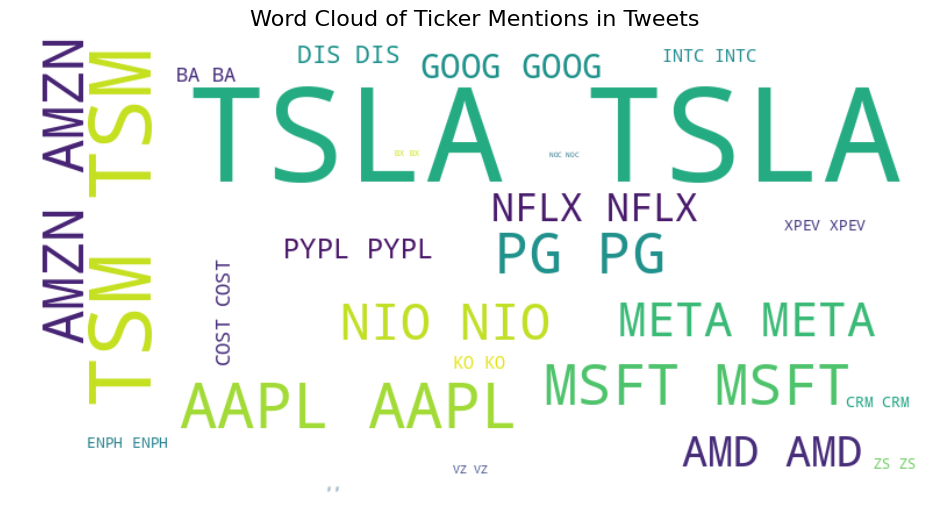

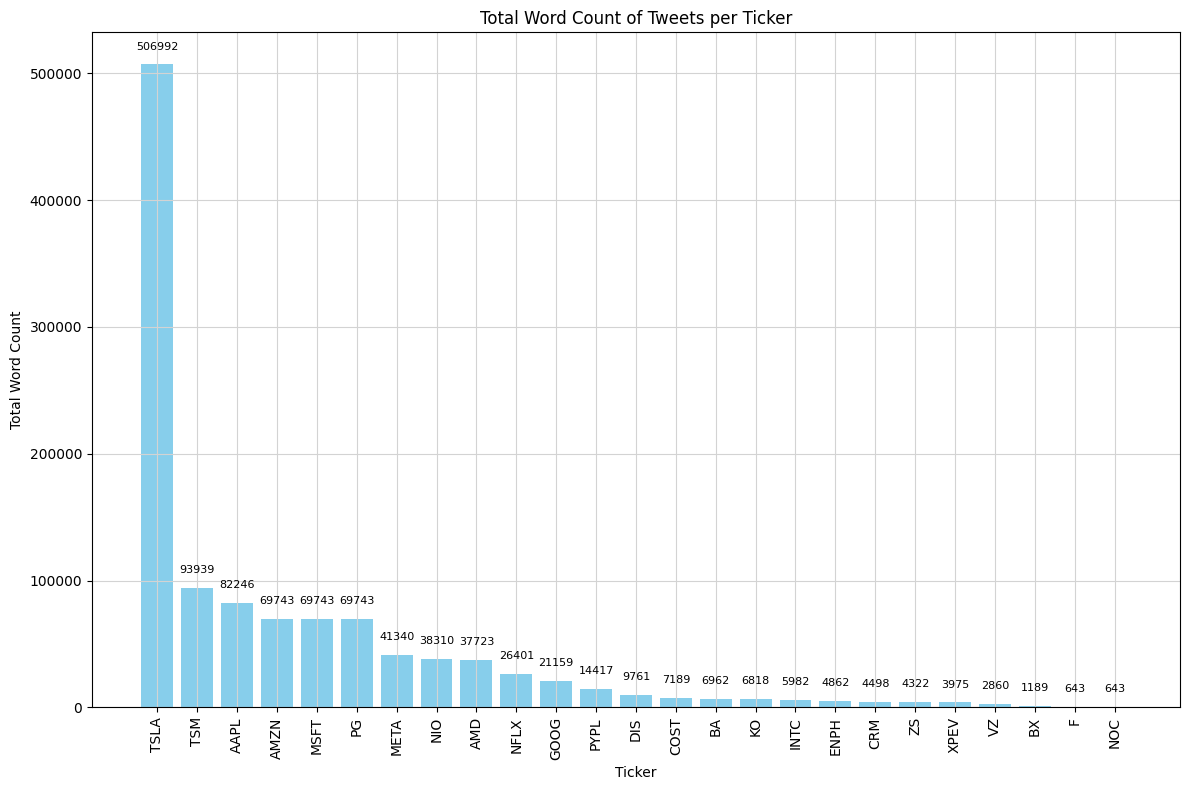

Total Word Count per Ticker:
ticker
TSLA    506992
TSM      93939
AAPL     82246
AMZN     69743
MSFT     69743
PG       69743
META     41340
NIO      38310
AMD      37723
NFLX     26401
GOOG     21159
PYPL     14417
DIS       9761
COST      7189
BA        6962
KO        6818
INTC      5982
ENPH      4862
CRM       4498
ZS        4322
XPEV      3975
VZ        2860
BX        1189
F          643
NOC        643
Name: word_count, dtype: int64


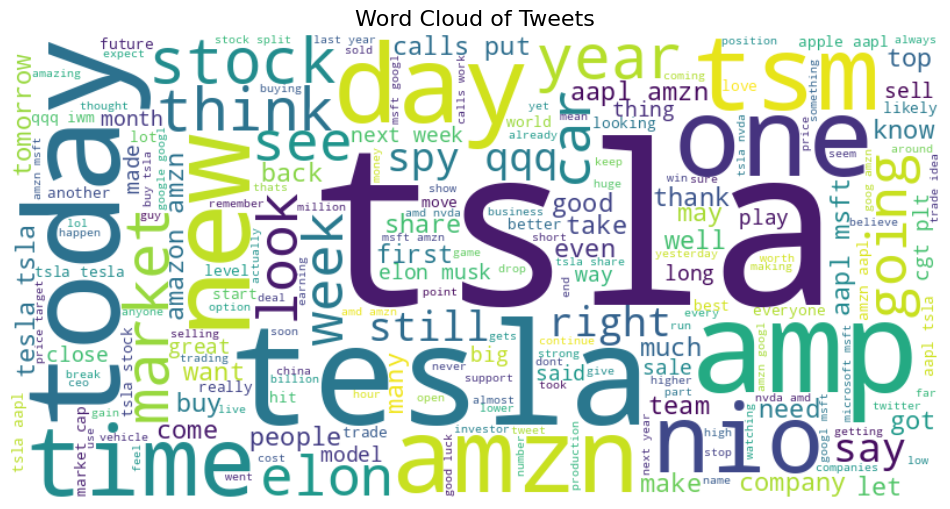

In [ ]:


def plot_ticker_and_tweet_visualizations(df):
    """
    Generate visualizations from a DataFrame containing 'ticker' and 'tweet' columns.

    Visualizations include:
      1. A word cloud of ticker mentions.
      2. A bar plot showing the total word count of tweets per ticker.
      3. A word cloud of all tweet texts.

    Parameters:
        df (pd.DataFrame): DataFrame containing at least the columns 'ticker' and 'tweet'.
    """
    # ---------------------------
    # 1. Word Cloud of Ticker Mentions
    # ---------------------------
    # Convert the 'ticker' column to string type to avoid any issues.
    df['ticker'] = df['ticker'].astype(str)

    # Concatenate all ticker values into a single string, separated by spaces.
    ticker_text = ' '.join(df['ticker'])

    # Generate a word cloud from the concatenated ticker text.
    ticker_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(ticker_text)

    # Plot the ticker word cloud.
    plt.figure(figsize=(12, 8))
    plt.imshow(ticker_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Ticker Mentions in Tweets", fontsize=16)
    plt.show()

    # ---------------------------
    # 2. Bar Plot: Total Word Count of Tweets per Ticker
    # ---------------------------
    # Ensure the 'ticker' and 'tweet' columns are in string format.
    df['ticker'] = df['ticker'].astype(str)
    df['tweet'] = df['tweet'].astype(str)

    # Create a new column for the word count of each tweet.
    df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

    # Group by 'ticker' and sum the word counts to get total word count per ticker.
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    # Set the figure size and create a bar plot for total word count per ticker.
    plt.figure(figsize=(12, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of Tweets per Ticker')
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

    # Add count labels on top of each bar.
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    # Rotate the x-axis labels for better readability.
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Optionally, print the total word counts for reference.
    print("Total Word Count per Ticker:")
    print(total_word_count_per_ticker)

    # ---------------------------
    # 3. Word Cloud of All Tweets
    # ---------------------------
    # Concatenate all tweet texts into a single string.
    all_tweets_text = ' '.join(df['tweet'])

    # Generate a word cloud from the combined tweet text with specified parameters.
    tweets_wordcloud = WordCloud(background_color='white', width=800, height=400,
                                 max_words=200, colormap='viridis').generate(all_tweets_text)

    # Plot the tweets word cloud.
    plt.figure(figsize=(12, 8))
    plt.imshow(tweets_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Tweets", fontsize=16)
    plt.show()


plot_ticker_and_tweet_visualizations(df_1)


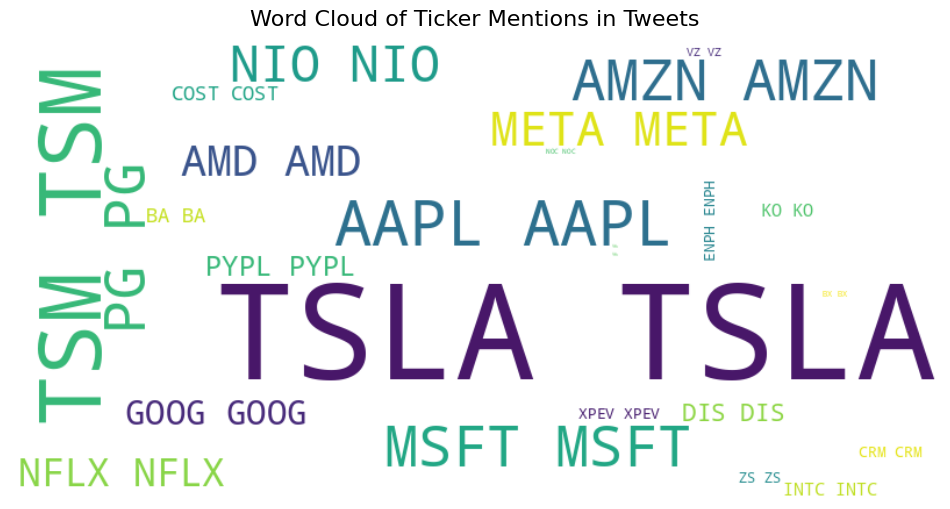

In [ ]:

# Convert the 'ticker' column to string type to avoid any issues
df_1['ticker'] = df_1['ticker'].astype(str)

# Concatenate all ticker values into a single string, separated by spaces
text = ' '.join(df_1['ticker'])

# Generate a word cloud from the concatenated ticker text
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Set up the plot with a specific figure size
plt.figure(figsize=(12, 8))

# Display the word cloud image using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axis labels
plt.axis('off')

# Show the plot
plt.title("Word Cloud of Ticker Mentions in Tweets", fontsize=16)
plt.show()


In [78]:
df_1

,date,tweet,ticker,company_name,open,high,low,close,volume,market_cap,p/e_ratio,dividend_yield,eps,word_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,27
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,6
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,22
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,23
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80764,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,12748700.0,1.753237e+10,NaN,NaN,-1.21,9
80765,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,6557200.0,1.753237e+10,NaN,NaN,-1.21,23
80766,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600.0,1.753237e+10,NaN,NaN,-1.21,15
80767,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600.0,1.753237e+10,NaN,NaN,-1.21,19


In [79]:
df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce').dt.date

In [ ]:
def download_nltk_resources():
    """
    Download necessary NLTK resources for text processing.

    This function downloads the following resources:
      - 'stopwords': A list of common stopwords for various languages.
      - 'punkt': Tokenizer for sentences and words.
      - 'wordnet': A lexical database for the English language.
      - 'omw-1.4': Open Multilingual WordNet data.
      - 'punkt_tab': A variant of the 'punkt' tokenizer.

    It prints a confirmation message after each resource is downloaded.
    """
    # List of required NLTK resources.
    resources = ['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'punkt_tab']

    # Loop through each resource and download it.
    for resource in resources:
        nltk.download(resource)
        print(f"Downloaded NLTK resource: {resource}")

download_nltk_resources()


Downloaded NLTK resource: stopwords
Downloaded NLTK resource: punkt
Downloaded NLTK resource: wordnet
Downloaded NLTK resource: omw-1.4
Downloaded NLTK resource: punkt_tab


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [ ]:


def download_and_tokenize_tweets(df, tweet_column='tweet'):
    """
    Downloads the necessary NLTK resource, tokenizes the tweet text, and adds a 'tokens' column.

    This function performs the following steps:
      1. Downloads the 'punkt' resource required for tokenization.
      2. Ensures the tweet column is in string format.
      3. Applies tokenization to each tweet in the specified column using a progress bar.
      4. Returns the DataFrame with an additional 'tokens' column containing tokenized words.

    Parameters:
        df (pd.DataFrame): DataFrame containing tweet data.
        tweet_column (str): The name of the column containing tweet text.
                            Default is 'tweet'.

    Returns:
        pd.DataFrame: The DataFrame with an added 'tokens' column.
    """
    # Download the NLTK 'punkt' resource (if not already downloaded)
    nltk.download('punkt')

    # Ensure the tweet column is of string type to avoid any issues during tokenization.
    df[tweet_column] = df[tweet_column].astype(str)

    # Initialize tqdm for progress bar usage.
    tqdm.pandas()

    def tokenize_tweet(text):
        """
        Tokenizes tweet text into individual words.

        Parameters:
            text (str): The tweet text.

        Returns:
            list: A list of word tokens, or an empty list if text is null.
        """
        if pd.isnull(text):
            return []
        return word_tokenize(text)

    # Apply tokenization to the tweet column using tqdm's progress_apply.
    df['tokens'] = df[tweet_column].progress_apply(tokenize_tweet)
    print("Tokenization completed.")

    return df


df_1_tokenized = download_and_tokenize_tweets(df_1, tweet_column='tweet')
print(df_1_tokenized.head())


[nltk_data] Downloading package punkt to /home/samyak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 80467/80467 [00:09<00:00, 8542.55it/s] 

Tokenization completed.
         date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close      volume  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   

     market_cap  p/e_ratio  dividend_yield   eps  word_count  

In [ ]:


def remove_stopwords_from_tokens(df, tokens_column='tokens'):
    """
    Downloads the necessary NLTK stopwords resource, loads the English stopwords list,
    and removes stopwords from the tokens in the specified DataFrame column.

    This function performs the following steps:
      1. Downloads the 'stopwords' resource if it's not already available.
      2. Loads the English stopwords list from NLTK.
      3. Defines a helper function to remove stopwords from a list of tokens.
      4. Applies the stopwords removal function on the specified tokens column using tqdm's progress bar.
      5. Creates a new column 'filtered_tokens' with the tokens after stopwords removal.
      6. Prints a confirmation message and returns the updated DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing tokenized data.
        tokens_column (str): The name of the column containing the tokenized text. Default is 'tokens'.

    Returns:
        pd.DataFrame: The updated DataFrame with an added 'filtered_tokens' column.
    """
    # Download the NLTK stopwords resource (if not already downloaded)
    nltk.download('stopwords')

    # Load the English stopwords list from NLTK
    stop_words = set(stopwords.words('english'))

    def remove_stopwords(tokens):
        """
        Removes stopwords from a list of tokens.

        Parameters:
            tokens (list): A list of word tokens.

        Returns:
            list: A list of tokens with stopwords removed, or an empty list if input is not a list.
        """
        if not isinstance(tokens, list):
            return []
        return [word for word in tokens if word.lower() not in stop_words]

    # Enable tqdm progress bar for pandas apply
    tqdm.pandas()

    # Apply stopwords removal on the tokens column and store results in 'filtered_tokens'
    df['filtered_tokens'] = df[tokens_column].progress_apply(remove_stopwords)
    print("Stop words removal completed.")

    return df


# Assuming 'df_1_tokenized' is your DataFrame with a 'tokens' column:
df_1_no_stopwords = remove_stopwords_from_tokens(df_1_tokenized, tokens_column='tokens')
print(df_1_no_stopwords.head())


[nltk_data] Downloading package stopwords to /home/samyak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 80467/80467 [00:00<00:00, 269837.95it/s]

Stop words removal completed.
         date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close      volume  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   

     market_cap  p/e_ratio  dividend_yield   eps  word_c

In [ ]:


def apply_lemmatization_to_tokens(df, tokens_column='filtered_tokens'):
    """
    Downloads necessary NLTK resources for lemmatization and applies lemmatization to tokens in a specified column.

    This function performs the following steps:
      1. Downloads the 'wordnet' and 'omw-1.4' resources if not already available.
      2. Initializes a WordNetLemmatizer.
      3. Defines a helper function to lemmatize a list of tokens.
      4. Applies the lemmatization function to each row of the specified tokens column using tqdm's progress bar.
      5. Stores the lemmatized tokens in a new column called 'lemmatized_tokens'.
      6. Returns the updated DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing tokenized data.
        tokens_column (str): The name of the column containing the tokens to be lemmatized.
                             Default is 'filtered_tokens'.

    Returns:
        pd.DataFrame: The updated DataFrame with an added 'lemmatized_tokens' column.
    """
    # Download required NLTK resources for lemmatization
    nltk.download('wordnet')
    nltk.download('omw-1.4')

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    def lemmatize_tokens(tokens):
        """
        Lemmatizes a list of tokens.

        Parameters:
            tokens (list): A list of tokens.

        Returns:
            list: A list of lemmatized tokens, or an empty list if input is not a list.
        """
        if not isinstance(tokens, list):
            return []
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Enable tqdm progress bar for pandas apply
    tqdm.pandas()

    # Apply the lemmatization function to the specified tokens column and store the results in 'lemmatized_tokens'
    df['lemmatized_tokens'] = df[tokens_column].progress_apply(lemmatize_tokens)
    print("Lemmatization completed.")

    return df


# Assuming df_1_no_stopwords is your DataFrame containing a 'filtered_tokens' column:
df_1_lemmatized = apply_lemmatization_to_tokens(df_1_no_stopwords, tokens_column='filtered_tokens')
print(df_1_lemmatized.head())


[nltk_data] Downloading package wordnet to /home/samyak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/samyak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|██████████| 80467/80467 [00:05<00:00, 14209.20it/s]


Lemmatization completed.
         date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close      volume  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  77620600.0   

     market_cap  p/e_ratio  dividend_yield   eps  word_count 

In [ ]:
def apply_financial_keywords_extraction(df, tokens_column='lemmatized_tokens'):
    """
    Counts financial-related keywords in tokenized tweets and adds a new column with the counts.

    This function performs the following steps:
      1. Defines an expanded list of financial-related keywords.
      2. Defines a helper function to count the number of financial keywords present in a list of tokens.
      3. Applies the helper function to each row in the specified tokens column using a progress bar.
      4. Stores the count in a new column 'financial_keyword_count'.

    Parameters:
        df (pd.DataFrame): The DataFrame containing tokenized tweet data.
        tokens_column (str): The name of the column containing tokenized text.
                             Default is 'lemmatized_tokens'.

    Returns:
        pd.DataFrame: The updated DataFrame with an added 'financial_keyword_count' column.
    """
    # Expanded list of financial-related keywords
    financial_keywords = [
        # Basic Finance Terms
        'profit', 'loss', 'revenue', 'growth', 'investment', 'dividend', 'portfolio', 'capital',
        'liquidity', 'merger', 'acquisition', 'stock', 'market', 'share', 'earnings', 'valuation',
        'bond', 'fund', 'equity', 'broker', 'index', 'exchange', 'asset', 'liability', 'return',

        # Trading and Market Terms
        'bullish', 'bearish', 'rally', 'slump', 'crash', 'surge', 'plummet', 'breakout', 'resistance', 'support',
        'short', 'long', 'buy', 'sell', 'hold', 'volume', 'volatility', 'momentum', 'divergence', 'correction',
        'trend', 'consolidation', 'liquidation', 'margin', 'leverage', 'stoploss', 'takeprofit', 'hedge',

        # Financial Ratios & Metrics
        'pe', 'p/e', 'eps', 'ebitda', 'debt', 'roi', 'roe', 'roa', 'cashflow', 'dividend_yield', 'valuation',
        'net_income', 'gross_margin', 'operating_margin', 'price_target', 'beta', 'book_value', 'market_cap',

        # Economic Indicators
        'inflation', 'deflation', 'interest_rate', 'gdp', 'unemployment', 'consumer_confidence', 'cpi', 'ppi',
        'recession', 'stimulus', 'quantitative_easing', 'federal_reserve', 'central_bank', 'treasury', 'bond_yield',

        # Company Actions
        'buyback', 'split', 'ipo', 'spinoff', 'dividend_increase', 'dividend_cut', 'earnings_report', 'forecast',

        # Sentiment & News Indicators
        'upgrade', 'downgrade', 'forecast', 'outlook', 'guidance', 'beat', 'miss', 'surpass', 'disappoint',

        # Cryptocurrencies & Modern Finance
        'crypto', 'bitcoin', 'ethereum', 'blockchain', 'nft', 'token', 'defi', 'exchange_traded_fund', 'etf'
    ]

    def count_financial_keywords(tokens):
        """
        Counts the number of financial-related keywords in a list of tokens.

        Parameters:
            tokens (list): A list of tokenized words.

        Returns:
            int: The count of financial keywords present in the tokens list.
        """
        if not isinstance(tokens, list):
            return 0
        return sum(1 for word in tokens if word in financial_keywords)

    # Enable progress bar for the apply function using tqdm.
    tqdm.pandas()

    # Apply the count function to the tokens column and create a new column 'financial_keyword_count'
    df['financial_keyword_count'] = df[tokens_column].progress_apply(count_financial_keywords)

    print("Financial keyword extraction completed.")
    return df


df_1_financial = apply_financial_keywords_extraction(df_1_lemmatized, tokens_column='lemmatized_tokens')
print(df_1_financial[['ticker', 'tweet', 'financial_keyword_count']].head())


100%|██████████| 80467/80467 [00:02<00:00, 37981.56it/s]

Financial keyword extraction completed.
  ticker                                              tweet  \
0   TSLA  mainstream media done amazing job brainwashing...   
1   TSLA      tesla delivery estimates around analysts tsla   
2   TSLA  even include unvested rsus additional equity n...   
3   TSLA  hahaha still trying stop tesla fsd bro get shi...   
4   TSLA         stop trying kill kids sad deranged old man   

   financial_keyword_count  
0                        0  
1                        0  
2                        3  
3                        0  
4                        0  


Unique ticker mention counts:
      ticker  ticker_mention_count
0       TSLA                 37266
37413   MSFT                  4084
41502     PG                  4084
45591   META                  2746
48342   AMZN                  4084


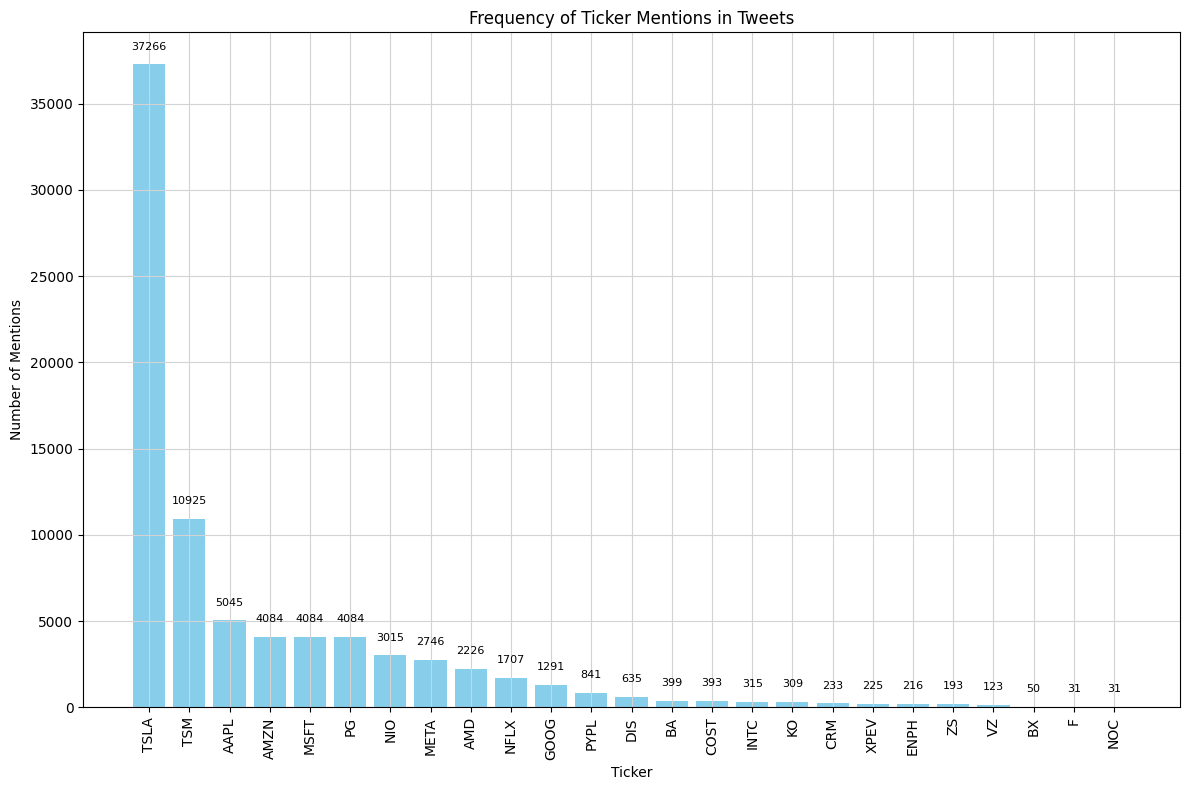

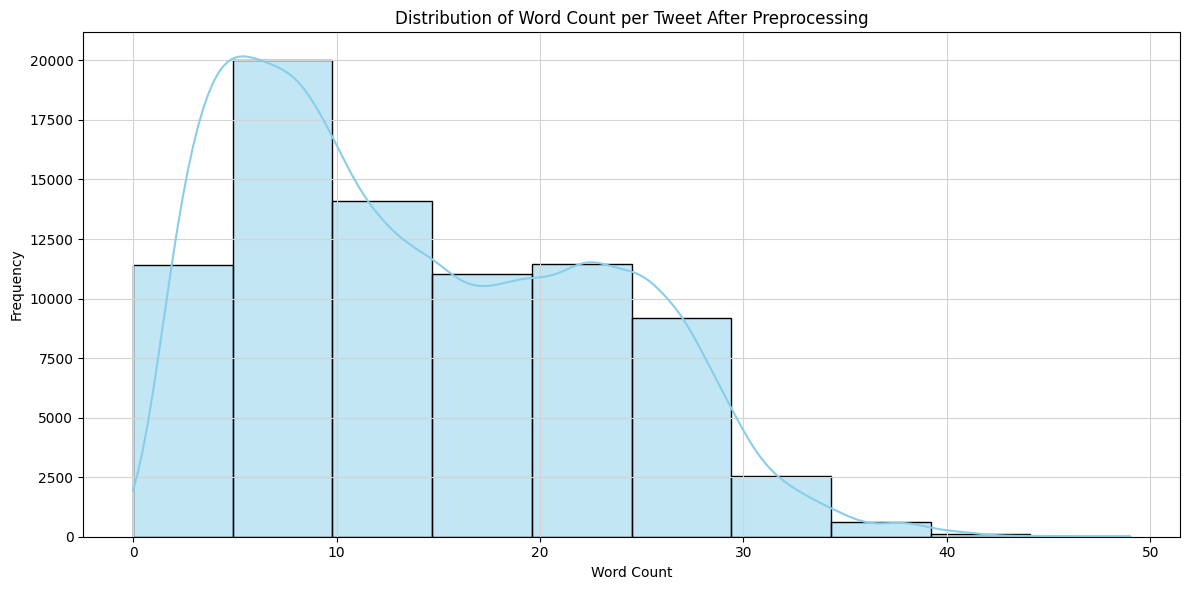

Average word count per ticker:
ticker
BX      23.780000
VZ      23.252033
ENPH    22.509259
ZS      22.393782
KO      22.064725
F       20.741935
NOC     20.741935
CRM     19.304721
INTC    18.990476
COST    18.292621
XPEV    17.666667
BA      17.448622
PYPL    17.142687
MSFT    17.077130
PG      17.077130
AMZN    17.077130
AMD     16.946541
GOOG    16.389620
AAPL    16.302478
NFLX    15.466315
DIS     15.371654
META    15.054625
TSLA    13.604680
NIO     12.706468
TSM      8.598535
Name: word_count, dtype: float64
Total word count before preprocessing: 1131460
Total word count after preprocessing: 1131460
Word count reduced by: 0.0% after preprocessing.


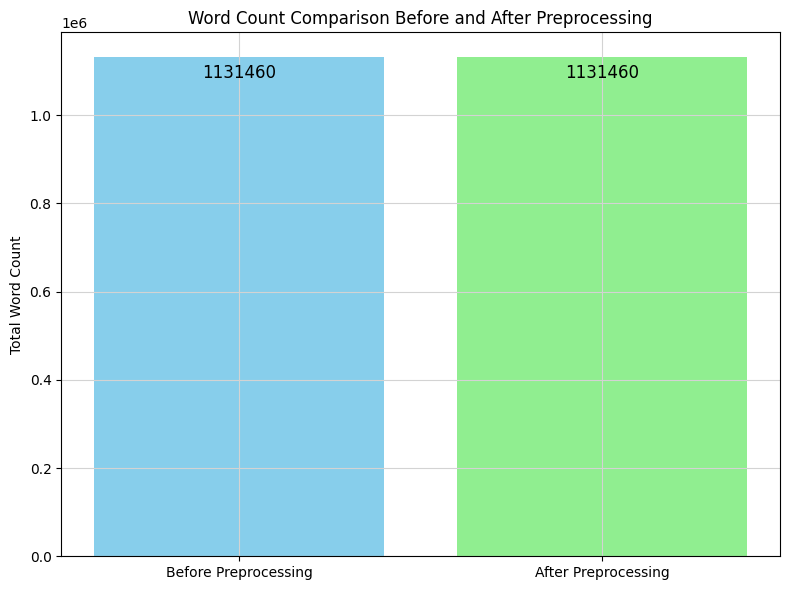

In [ ]:

def visualize_financial_analysis(df_1_financial):
    """
    Performs a series of visualizations and analyses on the df_1_financial DataFrame.

    The function does the following:
      1. Counts the number of mentions for each ticker and maps these counts back to the DataFrame.
      2. Displays unique ticker mention counts.
      3. Plots a bar chart of ticker mention frequency.
      4. Calculates word counts for each tweet and plots their distribution.
      5. Computes and displays the average word count per ticker.
      6. Compares total word counts before and after preprocessing, printing the results and plotting a comparison.

    Parameters:
        df_1_financial (pd.DataFrame): DataFrame containing at least the following columns:
            - 'ticker': Ticker symbols.
            - 'tweet': Original tweet text.

    Returns:
        None. Displays plots and prints outputs.
    """
    # ---------------------------
    # 1. Ticker Mention Count
    # ---------------------------
    # Count the number of mentions for each ticker
    ticker_mentions = df_1_financial['ticker'].value_counts().to_dict()

    # Map the count of ticker mentions back to the DataFrame
    df_1_financial['ticker_mention_count'] = df_1_financial['ticker'].map(ticker_mentions)

    # Display unique ticker mention counts
    unique_ticker_mentions = df_1_financial[['ticker', 'ticker_mention_count']].drop_duplicates()
    print("Unique ticker mention counts:")
    print(unique_ticker_mentions.head())

    # ---------------------------
    # Plot: Frequency of Ticker Mentions
    # ---------------------------
    # Convert the ticker mentions dictionary to a DataFrame for visualization
    ticker_mentions_df = pd.DataFrame(list(ticker_mentions.items()), columns=['ticker', 'mention_count']) \
        .sort_values(by='mention_count', ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(ticker_mentions_df['ticker'], ticker_mentions_df['mention_count'], color='skyblue')
    plt.title('Frequency of Ticker Mentions in Tweets')
    plt.xlabel('Ticker')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=90)

    # Add labels on top of bars
    for i, count in enumerate(ticker_mentions_df['mention_count']):
        plt.text(i, count + 0.02 * max(ticker_mentions_df['mention_count']), str(count),
                 ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    # ---------------------------
    # 2. Word Count Distribution per Tweet
    # ---------------------------
    # Function to count words in the cleaned tweet
    def count_words(text):
        """
        Counts the number of words in a cleaned tweet.
        """
        if not isinstance(text, str):
            return 0
        return len(text.split())

    # Apply the word count function to the DataFrame
    df_1_financial['word_count'] = df_1_financial['tweet'].apply(count_words)

    # Plot the distribution of word counts using Seaborn
    plt.figure(figsize=(12, 6))
    sns.histplot(df_1_financial['word_count'], bins=10, kde=True, color='skyblue')
    plt.title('Distribution of Word Count per Tweet After Preprocessing')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # ---------------------------
    # 3. Average Word Count per Ticker
    # ---------------------------
    average_word_count = df_1_financial.groupby('ticker')['word_count'].mean().sort_values(ascending=False)
    print("Average word count per ticker:")
    print(average_word_count)

    # ---------------------------
    # 4. Word Count Comparison Before and After Preprocessing
    # ---------------------------
    # Calculate total word count before preprocessing
    total_word_count = df_1_financial['tweet'].str.split().str.len().sum()

    # Calculate total word count after preprocessing
    total_word_count_preprocessing = df_1_financial['tweet'].str.split().str.len().sum()

    # Print the total word counts
    print(f'Total word count before preprocessing: {int(total_word_count)}')
    print(f'Total word count after preprocessing: {int(total_word_count_preprocessing)}')

    # Calculate percentage reduction in word count after preprocessing
    percentage_reduction = round((total_word_count - total_word_count_preprocessing) / total_word_count * 100, 2)
    print(f'Word count reduced by: {percentage_reduction}% after preprocessing.')

    # Plot the word count comparison
    word_counts = [total_word_count, total_word_count_preprocessing]
    labels = ['Before Preprocessing', 'After Preprocessing']

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, word_counts, color=['skyblue', 'lightgreen'])
    plt.title('Word Count Comparison Before and After Preprocessing')
    plt.ylabel('Total Word Count')

    # Add labels on top of each bar
    for bar, count in zip(bars, word_counts):
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() - (0.05 * max(word_counts)),
                 f'{count}', ha='center', va='bottom', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()


visualize_financial_analysis(df_1_financial)


In [86]:
!pip install mplfinance

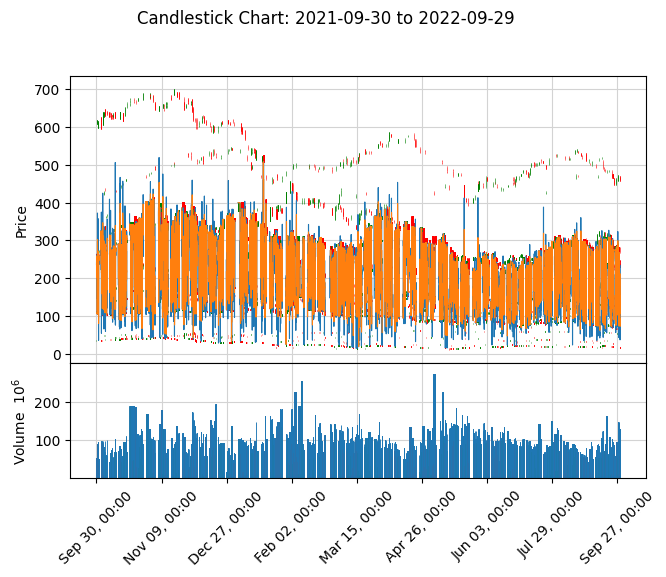

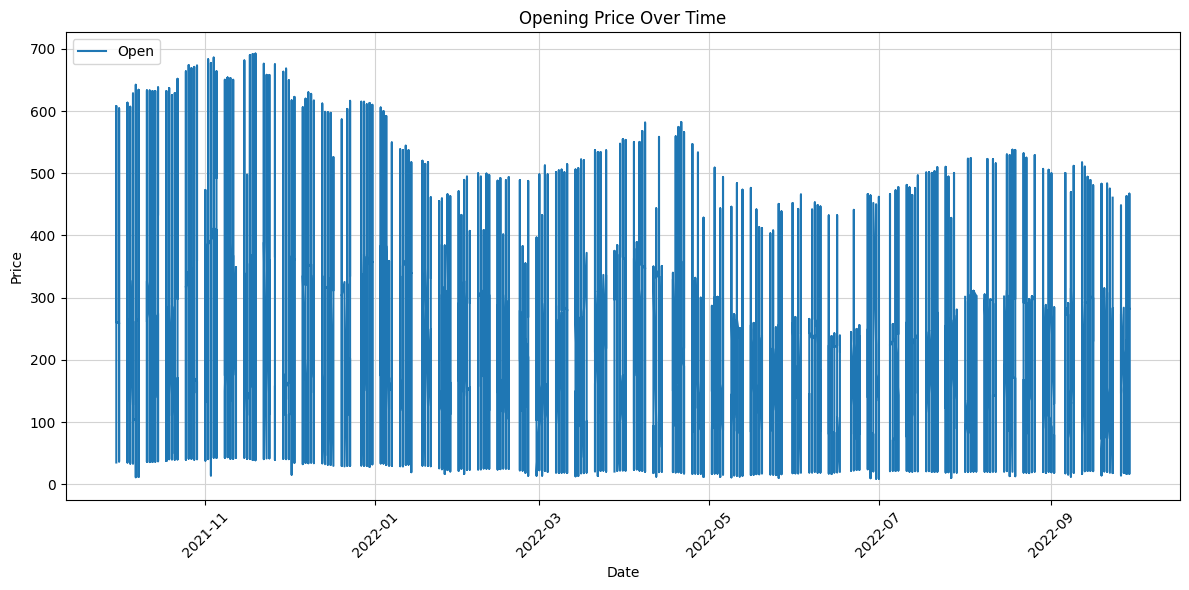

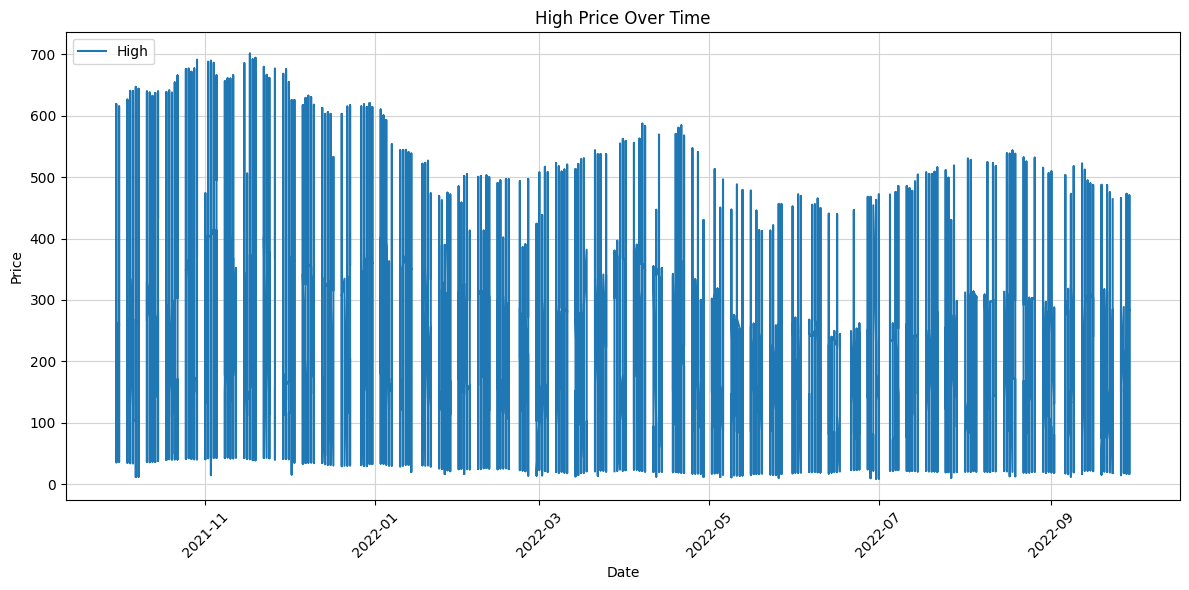

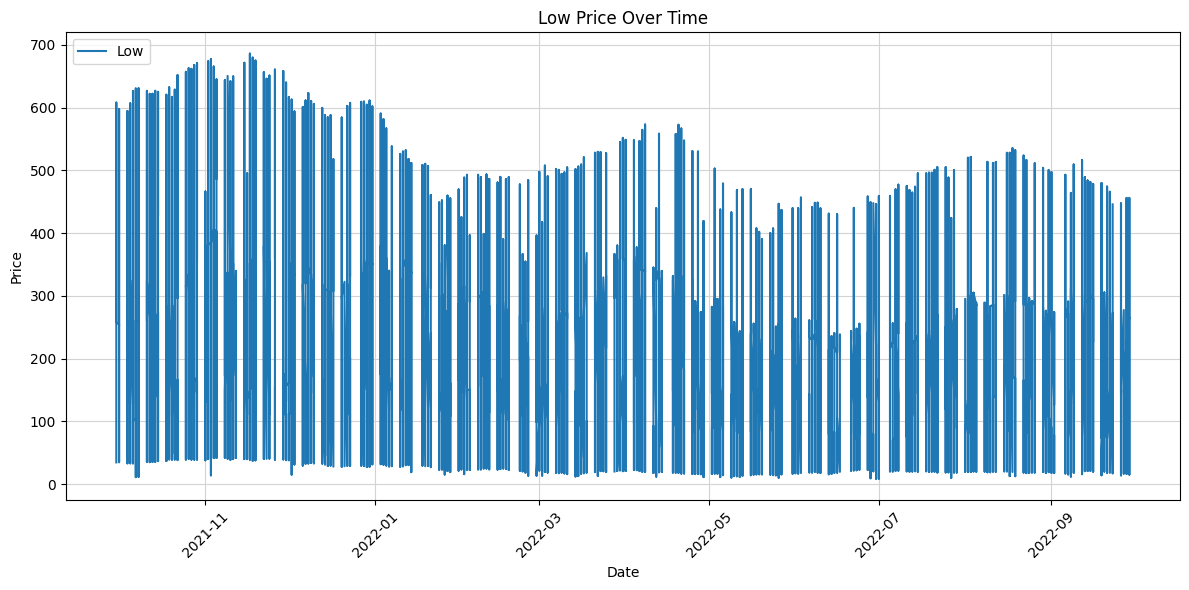

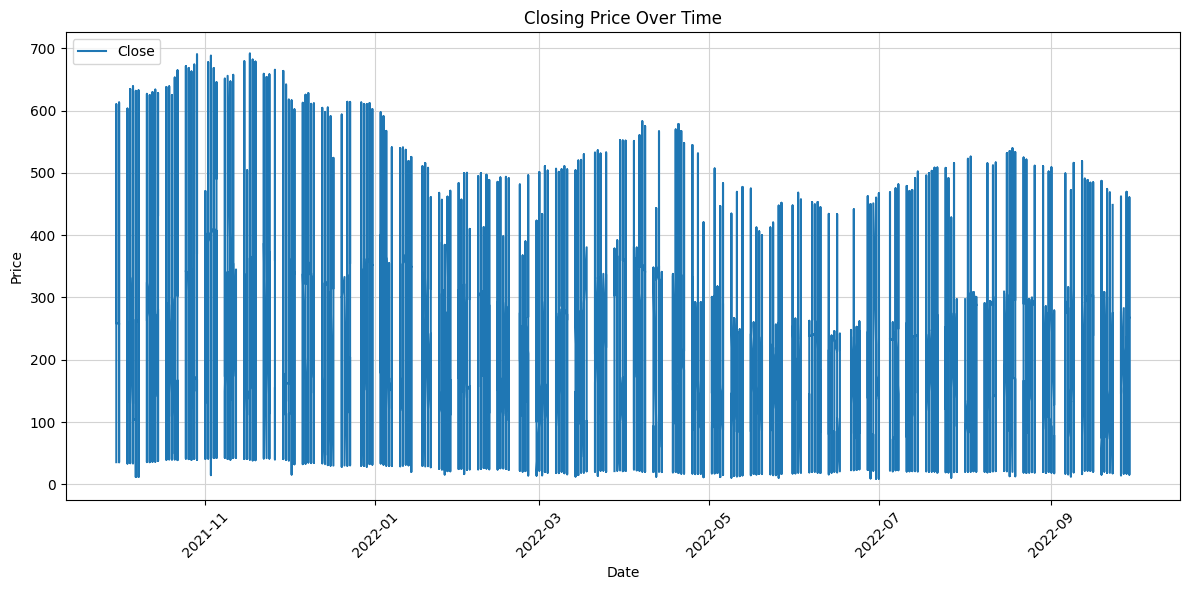

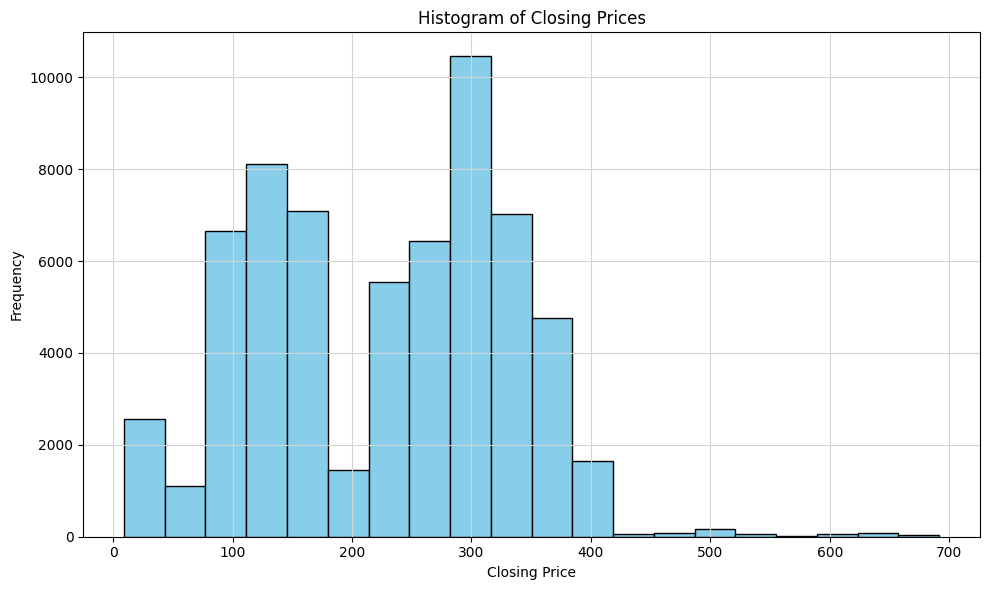

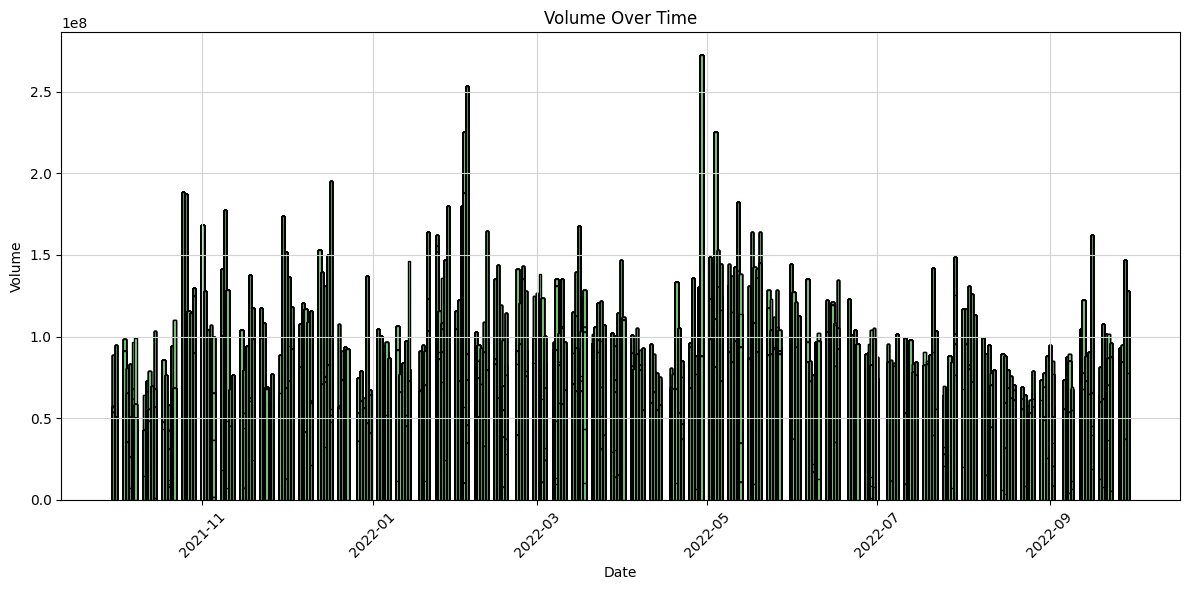

In [ ]:

def plot_stock_visualizations(df_1):
    """
    Generates various stock visualizations from the provided DataFrame.

    Visualizations include:
      1. Candlestick chart with volume and moving averages.
      2. Time series line plot for open, high, low, and close prices.
      3. Histogram of closing prices.
      4. Bar plot for volume over time.
      5. Time series plot for P/E ratio (if available).

    Parameters:
        df_1 (pd.DataFrame): DataFrame containing stock data with columns:
                             'date', 'open', 'high', 'low', 'close', 'volume',
                             and optionally 'p/e' or 'pe' for P/E ratio.
    """
    # ---------------------------
    # Prepare Data
    # ---------------------------
    # Ensure 'date' is in datetime format and sort the DataFrame by date.
    df_1['date'] = pd.to_datetime(df_1['date'])
    df_sorted = df_1.sort_values('date')

    # ---------------------------
    # 1. Candlestick Chart with Volume
    # ---------------------------
    # Set 'date' as index for mplfinance
    df_candle = df_sorted.set_index('date')

    # Define custom market colors and style for better readability
    market_colors = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='in')
    style = mpf.make_mpf_style(marketcolors=market_colors, gridstyle='-', gridcolor='lightgray')

    # Create a title that includes the date range
    title = f'Candlestick Chart: {df_candle.index.min().date()} to {df_candle.index.max().date()}'

    # Plot the candlestick chart with volume and 10/20-day moving averages
    mpf.plot(df_candle, type='candle', style=style, title=title, volume=True, mav=(10, 20))

    # ---------------------------
    # 2. Time Series Plot of Stock Prices
    # ---------------------------
    # Define plot settings
    price_columns = ['open', 'high', 'low', 'close']
    plot_titles = ['Opening Price Over Time', 'High Price Over Time', 'Low Price Over Time', 'Closing Price Over Time']

    # Loop through each price type and create a separate plot
    for column, title in zip(price_columns, plot_titles):
        plt.figure(figsize=(12, 6))
        plt.plot(df_sorted['date'], df_sorted[column], label=column.capitalize(), linewidth=1.5)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(title)
        plt.legend(loc='upper left')
        plt.xticks(rotation=45)
        plt.grid(True)  # Add a grid for better readability
        plt.tight_layout()
        plt.show()
    # ---------------------------
    # 3. Histogram of Closing Prices
    # ---------------------------
    plt.figure(figsize=(10, 6))
    plt.hist(df_sorted['close'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Closing Prices')
    plt.tight_layout()
    plt.show()

    # ---------------------------
    # 4. Volume Time Series Plot
    # ---------------------------
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['date'], df_sorted['volume'], color='lightgreen', edgecolor='black')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title('Volume Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




plot_stock_visualizations(df_1)


In [32]:
!pip install tensorflow


In [33]:
!pip install transformers

In [34]:
!pip install transformers --upgrade
!pip install more-itertools

In [90]:
df_1_financial.head()

,date,tweet,ticker,company_name,open,high,low,close,volume,market_cap,p/e_ratio,dividend_yield,eps,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,37266
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,37266
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,37266
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,37266
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600.0,1.086540e+12,166.40393,NaN,2.03,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,37266


In [ ]:


# Optional: Force TensorFlow usage (requires TensorFlow installed)
# os.environ["TRANSFORMERS_NO_TORCH"] = "1"

# -----------------------------------------------------------------------------
# Initialize the FinBERT sentiment analysis pipeline.
# Note: "yiyanghkust/finbert-tone" is the model identifier for FinBERT.
# Depending on your environment, it may default to PyTorch.
# -----------------------------------------------------------------------------
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

def get_sentiment(text):
    """
    Get the sentiment label and score for the input text using FinBERT.

    Parameters:
        text (str): The input text (e.g., a tweet) to analyze.

    Returns:
        tuple: A tuple containing (sentiment_label, sentiment_score).
    """
    result = sentiment_pipeline(text)
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    return sentiment_label, sentiment_score

def apply_bert_sentiment(df, text_column="tweet"):
    """
    Applies FinBERT sentiment analysis to the text in the specified column of a DataFrame.

    This function performs the following:
      1. Enables a progress bar using tqdm.
      2. Applies the FinBERT sentiment analysis pipeline to each text entry.
      3. Extracts the sentiment label and sentiment score.
      4. Stores the results in two new columns: 'sentiment_label' and 'sentiment_score'.

    Parameters:
        df (pd.DataFrame): DataFrame containing a column with text data.
        text_column (str): The name of the column containing text. Default is 'tweet'.

    Returns:
        pd.DataFrame: The updated DataFrame with added 'sentiment_label' and 'sentiment_score' columns.
    """
    # Enable tqdm progress bar for the pandas apply method.
    tqdm.pandas()

    # Apply the get_sentiment function to each text entry,
    # expanding the returned tuple into two separate columns.
    df[['sentiment_label', 'sentiment_score']] = df[text_column].progress_apply(lambda text: pd.Series(get_sentiment(text)))

    print("BERT sentiment analysis completed.")
    return df

# -----------------------------------------------------------------------------

# Ensure that 'df_1_financial' is a DataFrame that contains at least the columns 'tweet' and 'ticker'.
# -----------------------------------------------------------------------------
df_1_financial = apply_bert_sentiment(df_1_financial)

# Display the first few rows to verify that the sentiment analysis results have been added.
print(df_1_financial[['ticker', 'tweet', 'sentiment_label', 'sentiment_score']].head())


2025-02-23 01:08:46.986741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740269327.872757  172858 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740269328.152877  172858 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 01:08:50.586740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-23 01:09:12.912888: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

In [ ]:
df_1_financial

,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,adj_close,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count,sentiment_label,sentiment_score
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,0.0,0.0,NaN,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,19166,Positive,0.999805
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,0.0,0.0,NaN,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,19166,Neutral,0.999981
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,0.0,0.0,NaN,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,19166,Neutral,0.999972
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,0.0,0.0,NaN,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,19166,Neutral,0.987516
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600.0,0.0,0.0,NaN,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,19166,Neutral,0.742179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39554,2021-10-13,good bad market indexes downtrend poor interna...,ZS,"Zscaler, Inc.",279.779999,287.970001,279.320007,286.640015,1960900.0,0.0,0.0,NaN,28,"[good, bad, market, indexes, downtrend, poor, ...","[good, bad, market, indexes, downtrend, poor, ...","[good, bad, market, index, downtrend, poor, in...",5,79,Positive,0.998001
39555,2021-10-13,panw raro entre las cybersecurity ftnt crwd,ZS,"Zscaler, Inc.",279.779999,287.970001,279.320007,286.640015,1960900.0,0.0,0.0,NaN,7,"[panw, raro, entre, las, cybersecurity, ftnt, ...","[panw, raro, entre, las, cybersecurity, ftnt, ...","[panw, raro, entre, la, cybersecurity, ftnt, c...",0,79,Neutral,0.999980
39556,2021-10-04,correction important keep eye valuations stand...,ZS,"Zscaler, Inc.",261.350006,261.350006,248.330002,251.860001,2245600.0,0.0,0.0,NaN,28,"[correction, important, keep, eye, valuations,...","[correction, important, keep, eye, valuations,...","[correction, important, keep, eye, valuation, ...",3,79,Neutral,0.960232
39557,2021-10-01,let call buzzer beater month september versus ...,ZS,"Zscaler, Inc.",263.170013,264.850006,257.096985,263.160004,1135300.0,0.0,0.0,NaN,20,"[let, call, buzzer, beater, month, september, ...","[let, call, buzzer, beater, month, september, ...","[let, call, buzzer, beater, month, september, ...",0,79,Positive,0.726288


In [ ]:

# -----------------------------------------------------------------------------
# Encode the 'sentiment' column using LabelEncoder
# -----------------------------------------------------------------------------
# Initialize the LabelEncoder.
label_encoder = LabelEncoder()

# Check if the 'sentiment' column exists in the DataFrame.
if 'sentiment_label' in df_1_financial.columns:
    # Fit the label encoder on the 'sentiment' column and transform it,
    # creating a new column 'sentiment_encoded'.
    df_1_financial['sentiment_encoded'] = label_encoder.fit_transform(df_1_financial['sentiment_label'])

    # Preview the unique sentiment labels and their corresponding encoded values.
    print("Encoded sentiment values:")
    print(df_1_financial[['sentiment_label', 'sentiment_encoded']].drop_duplicates())
else:
    print("Column 'sentiment' not found in the DataFrame.")

# -----------------------------------------------------------------------------
# Flatten the tokenized tweets into a single space-separated string
# -----------------------------------------------------------------------------
def flatten_tokens(tokens):
    """
    Converts a list of tokens into a single space-separated string.

    Parameters:
        tokens (list): A list of tokenized words.

    Returns:
        str: A single string containing all tokens separated by a space.
             Returns an empty string if the input is not a list.
    """
    if isinstance(tokens, list):
        return ' '.join(tokens)
    return ''

# Check if the 'lemmatized_tokens' column exists before applying the flattening function.
if 'lemmatized_tokens' in df_1_financial.columns:
    # Apply the flatten_tokens function to the 'lemmatized_tokens' column
    # to create a new column 'flattened_tweet'.
    df_1_financial['flattened_tweet'] = df_1_financial['lemmatized_tokens'].apply(flatten_tokens)

    # Display the first few rows of the ticker and flattened tweet columns.
    print("Flattened tweets preview:")
    print(df_1_financial[['ticker', 'flattened_tweet']].head())
else:
    print("Column 'lemmatized_tokens' not found in the DataFrame.")


Encoded sentiment values:
  sentiment_label  sentiment_encoded
0        Positive                  2
1         Neutral                  1
9        Negative                  0
Flattened tweets preview:
  ticker                                    flattened_tweet
0   TSLA  mainstream medium done amazing job brainwashin...
1   TSLA        tesla delivery estimate around analyst tsla
2   TSLA  even include unvested rsus additional equity n...
3   TSLA  hahaha still trying stop tesla fsd bro get shi...
4   TSLA          stop trying kill kid sad deranged old man


'sentiment_encoded' column already exists.
Shape of Bag-of-Words Representation: (39400, 1000)
Shape after applying PCA: (39400, 100)
Shape after SMOTE: (85035, 100)
Training Set Shape: (68028, 100)
Testing Set Shape: (17007, 100)

Training and evaluating Random Forest...

Results for Random Forest:
Accuracy: 0.9149173869583113
Classification Report:
               precision    recall  f1-score   support

    Negative       0.94      0.97      0.95      5637
     Neutral       0.90      0.87      0.88      5730
    Positive       0.90      0.91      0.91      5640

    accuracy                           0.91     17007
   macro avg       0.91      0.92      0.91     17007
weighted avg       0.91      0.91      0.91     17007



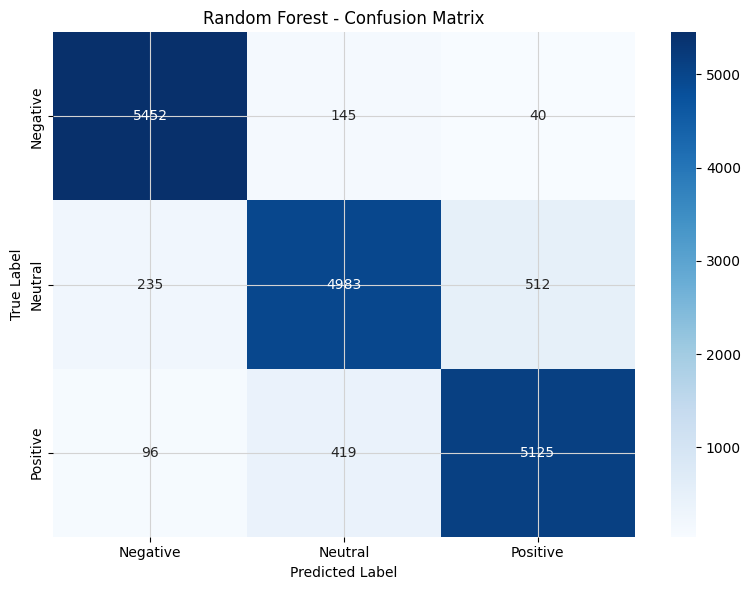


Training and evaluating Support Vector Machine...

Results for Support Vector Machine:
Accuracy: 0.7692126771329453
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.83      0.80      5637
     Neutral       0.71      0.76      0.74      5730
    Positive       0.83      0.72      0.77      5640

    accuracy                           0.77     17007
   macro avg       0.77      0.77      0.77     17007
weighted avg       0.77      0.77      0.77     17007



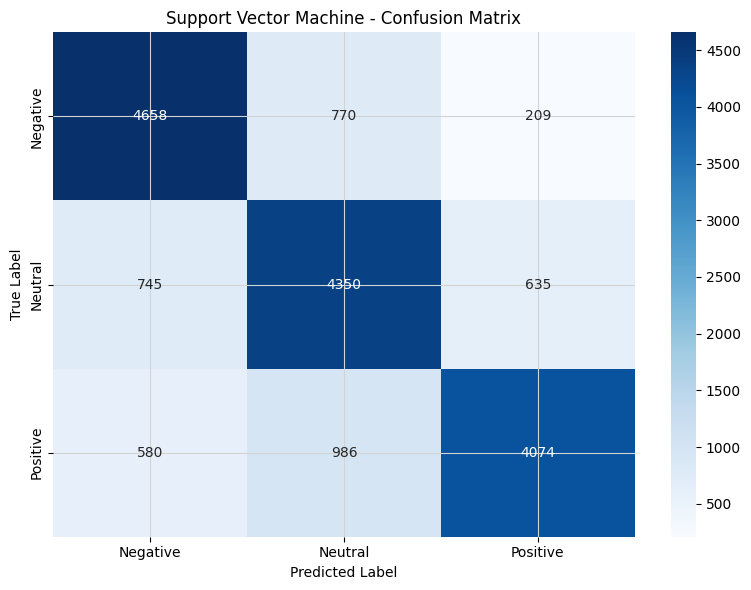


Training and evaluating XGBoost...

Results for XGBoost:
Accuracy: 0.8356559063914859
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.91      0.87      5637
     Neutral       0.83      0.78      0.80      5730
    Positive       0.84      0.82      0.83      5640

    accuracy                           0.84     17007
   macro avg       0.84      0.84      0.83     17007
weighted avg       0.84      0.84      0.83     17007



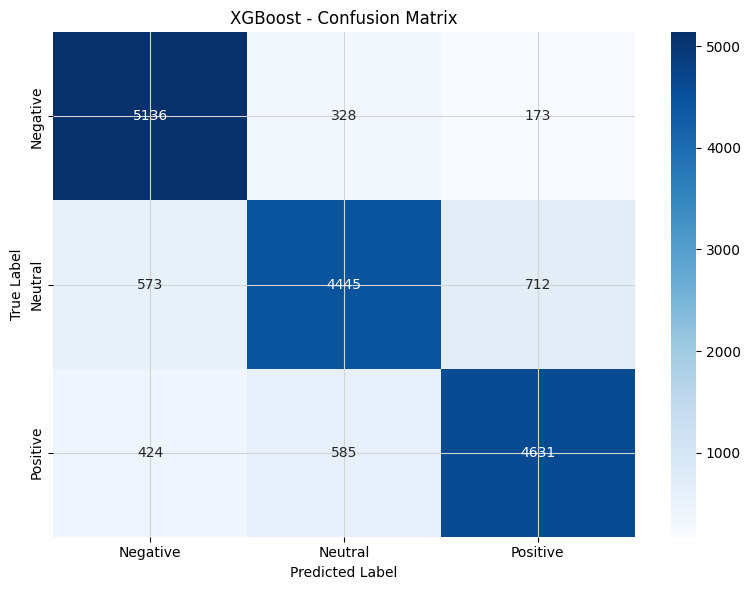


Training and evaluating Logistic Regression...

Results for Logistic Regression:
Accuracy: 0.5583583230434527
Classification Report:
               precision    recall  f1-score   support

    Negative       0.54      0.57      0.55      5637
     Neutral       0.53      0.59      0.56      5730
    Positive       0.63      0.52      0.57      5640

    accuracy                           0.56     17007
   macro avg       0.56      0.56      0.56     17007
weighted avg       0.56      0.56      0.56     17007



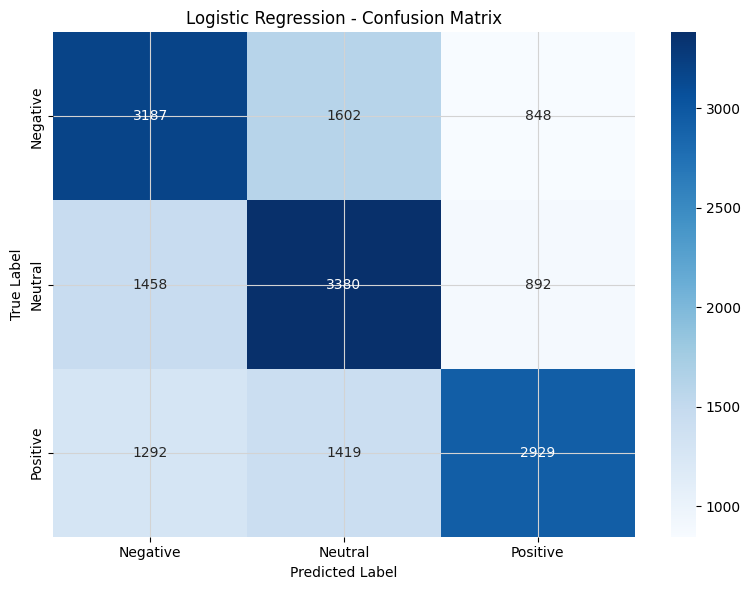

In [ ]:



# -----------------------------------------------------------------------------
# Step A: Encode the Sentiment Labels
# -----------------------------------------------------------------------------
# Check if 'sentiment_encoded' exists; if not, create it using the 'sentiment_label' column.
if 'sentiment_encoded' not in df_1_financial.columns:
    label_encoder = LabelEncoder()
    df_1_financial['sentiment_encoded'] = label_encoder.fit_transform(df_1_financial['sentiment_label'])
    print("Created 'sentiment_encoded' column.")
else:
    print("'sentiment_encoded' column already exists.")

# Define category names from the label encoder if available, otherwise from the DataFrame.
try:
    category_names = list(label_encoder.classes_)
except NameError:
    category_names = sorted(df_1_financial['sentiment_label'].unique().tolist())

# -----------------------------------------------------------------------------
# Step B: Prepare Text Features Using CountVectorizer, PCA, and SMOTE
# -----------------------------------------------------------------------------
def prepare_features_with_smote(df, text_column='flattened_tweet', target_column='sentiment_encoded',
                                max_features=1000, n_components=100, test_size=0.2, random_state=42):
    """
    Prepares text features for classification by performing the following steps:
      1. Converts text into a Bag-of-Words representation using CountVectorizer.
      2. Applies PCA for dimensionality reduction.
      3. Handles imbalanced target classes using SMOTE.
      4. Splits the resulting features and target labels into training and testing sets.

    Parameters:
        df (pd.DataFrame): DataFrame containing text data and target labels.
        text_column (str): Column name containing the text data. Default is 'flattened_tweet'.
        target_column (str): Column name containing target labels. Default is 'sentiment_encoded'.
        max_features (int): Maximum number of features for CountVectorizer. Default is 1000.
        n_components (int): Number of principal components for PCA. Default is 100.
        test_size (float): Fraction of data to use as the test set. Default is 0.2.
        random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
        tuple: (X_train, X_test, y_train, y_test) after processing.
    """
    # Step 1: Bag-of-Words Representation
    vectorizer = CountVectorizer(max_features=max_features)
    X_bow = vectorizer.fit_transform(df[text_column]).toarray()
    print("Shape of Bag-of-Words Representation:", X_bow.shape)

    # Step 2: Dimensionality Reduction using PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_bow)
    print("Shape after applying PCA:", X_pca.shape)

    # Step 3: Handling Imbalanced Data using SMOTE
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_pca, df[target_column])
    print("Shape after SMOTE:", X_resampled.shape)

    # Step 4: Splitting Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print("Training Set Shape:", X_train.shape)
    print("Testing Set Shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

# Prepare the features
X_train, X_test, y_train, y_test = prepare_features_with_smote(df_1_financial)

# -----------------------------------------------------------------------------
# Step C: Model Building and Evaluation
# -----------------------------------------------------------------------------
# Define classifiers in a dictionary
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Function to plot a confusion matrix as a heatmap
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix heatmap.

    Parameters:
        cm (array-like): Confusion matrix.
        classes (list): List of class names.
        title (str): Title for the plot.
        cmap: Color map for the heatmap.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining and evaluating {name}...\n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=category_names)

    print(f"Results for {name}:")
    print("Accuracy:", acc)
    print("Classification Report:\n", cr)

    # Plot the confusion matrix
    plot_confusion_matrix(cm, classes=category_names, title=f"{name} - Confusion Matrix")
    print("=" * 60)

    # For binary classification, plot ROC curve (if applicable)
    if len(category_names) == 2:
         y_prob = clf.predict_proba(X_test)[:, 1]
         fpr, tpr, _ = roc_curve(y_test, y_prob)
         roc_auc = auc(fpr, tpr)
         plt.figure(figsize=(8, 6))
         plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
         plt.plot([0, 1], [0, 1], 'k--')
         plt.xlabel('False Positive Rate')
         plt.ylabel('True Positive Rate')
         plt.title(f'{name} - ROC Curve')
         plt.legend(loc="lower right")
         plt.tight_layout()
         plt.show()


In [ ]:

# Step A: Ensure the sentiment column is encoded.
if 'sentiment_encoded' not in df_1_financial.columns:
    label_encoder = LabelEncoder()
    df_1_financial['sentiment_encoded'] = label_encoder.fit_transform(df_1_financial['sentiment_label'])
    print("Created 'sentiment_encoded' column.")
else:
    print("'sentiment_encoded' column already exists.")

# Step B: Prepare text features with SMOTE and PCA.
def prepare_features_with_smote(df, text_column='flattened_tweet', target_column='sentiment_encoded',
                                max_features=1000, n_components=100, test_size=0.2, random_state=42):
    """
    Prepares text features for classification:
      1. Converts text to a Bag-of-Words representation.
      2. Applies PCA for dimensionality reduction.
      3. Handles imbalanced data using SMOTE.
      4. Splits data into training and testing sets.
    """
    # Bag-of-Words
    vectorizer = CountVectorizer(max_features=max_features)
    X_bow = vectorizer.fit_transform(df[text_column]).toarray()
    print("Shape of Bag-of-Words Representation:", X_bow.shape)

    # PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_bow)
    print("Shape after applying PCA:", X_pca.shape)

    # SMOTE for balancing classes
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_pca, df[target_column])
    print("Shape after SMOTE:", X_resampled.shape)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print("Training Set Shape:", X_train.shape)
    print("Testing Set Shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

# Prepare features
X_train, X_test, y_train, y_test = prepare_features_with_smote(df_1_financial)

# Proceed with training a classifier (example using Logistic Regression)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


'sentiment_encoded' column already exists.
Shape of Bag-of-Words Representation: (39400, 1000)
Shape after applying PCA: (39400, 100)
Shape after SMOTE: (85035, 100)
Training Set Shape: (68028, 100)
Testing Set Shape: (17007, 100)

Accuracy: 0.5583583230434527

Confusion matrix:
 [[3187 1602  848]
 [1458 3380  892]
 [1292 1419 2929]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.55      5637
           1       0.53      0.59      0.56      5730
           2       0.63      0.52      0.57      5640

    accuracy                           0.56     17007
   macro avg       0.56      0.56      0.56     17007
weighted avg       0.56      0.56      0.56     17007



In [ ]:
X_train, X_test, y_train, y_test = prepare_text_features(df_1_financial)
